In [1]:
from IPython.display import Markdown
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import *
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.metrics import *
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score 
#from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
# --------------- Load data ----------------------
# data file consist of nodule name,  columns of features and final column containing diagnosis: 0-benign/1-malign
directory = "C:/Users/Juan/Documents/MedPhys/Cursos/Tesis/Codigos" 
file = 'Datos.xlsx'
import os
import pandas as pd
os.chdir(directory)
df = pd.read_excel(file)
df.rename(columns={'Diagnosis (0: benign - 1:malign)' : 'Diagnosis'},inplace=True)
df = df.dropna()
df.head()

Scan Number  Nodule Number  Volumetric Features::Volume (mesh based)  \
0       LC001              1                                   56.2917   
1       LC002              1                                  265.3330   
2       LC003              1                                  732.5000   
3       LC008              1                                 3429.0400   
4       LC009              1                                 5678.1200   

   Volumetric Features::Surface (mesh based)  \
0                                    83.9738   
1                                   391.0320   
2                                   578.9970   
3                                  1661.4900   
4                                  4019.2000   

   Volumetric Features::Surface to volume ratio (mesh based)  \
0                                           1.491760           
1                                           1.473740           
2                                           0.790440           
3                                           0.484536           
4                                           0.707839           

   Volumetric Features::Sphericity (mesh based)  \
0                                      0.902127   
1                                      0.534339   
2                                      0.688244   
3                                      0.666352   
4                                      0.385956   

   Volumetric Features::Compactness 2 (mesh based)  First Order Numeric::Mean  \
0                                         0.734182                  -174.6420   
1                                         0.152563                  -247.2420   
2                                         0.326007                  -207.8230   
3                                         0.295877                   -35.9023   
4                                         0.057493                   -95.4279   

   First Order Numeric::Variance  First Order Numeric::Skewness  ...  \
0                        77852.8                       0.068636  ...   
1                        70142.9                       0.481504  ...   
2                        66356.5                       0.129796  ...   
3                        39788.2                      -1.475380  ...   
4                        58487.1                      -0.629274  ...   

   First Order Numeric::Kurtosis  First Order Numeric::Entropy  \
0                        1.71667                      -5.17412   
1                        2.00900                      -5.70381   
2                        1.69344                      -5.90782   
3                        3.90486                      -5.00681   
4                        2.26550                      -5.82750   

   First Order Numeric::Uniformtiy  \
0                         0.032258   
1                         0.022615   
2                         0.017576   
3                         0.048561   
4                         0.019962   

   Co-occurenced Based Features::Overall Joint Entropy  \
0                                            9.04610     
1                                           10.73400     
2                                           11.39900     
3                                            9.20601     
4                                           11.16190     

   Co-occurenced Based Features::Overall Angular Second Moment  \
0                                           0.002600             
1                                           0.000827             
2                                           0.000475             
3                                           0.004741             
4                                           0.000788             

   Co-occurenced Based Features::Overall Contrast  \
0                                         748.520   
1                                         623.861   
2                                         369.971   
3                                         175.157   
4                  

<Figure size 432x288 with 0 Axes>

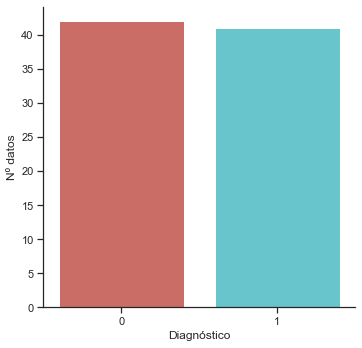

In [4]:
# check if list contain imbalanced data
import seaborn as sns
import matplotlib.pyplot as plt
# Revisando oversampling - undersampling de las muestras
%matplotlib inline
plt.figure()
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Diagnosis", kind="count",palette="hls", data=df);#plt.bar(df.Diagnosis.unique(), df.Diagnosis.value_counts());
#plt.savefig("Diagnosis_barplot.png", bbox_inches='tight', dpi=600)
plt.xlabel('Diagnóstico')
plt.ylabel('Nº datos')
plt.show()


In [6]:
# A better list of all features
list(df.columns.values[2:-1])

['Volumetric Features::Volume (mesh based)',
 'Volumetric Features::Surface (mesh based)',
 'Volumetric Features::Surface to volume ratio (mesh based)',
 'Volumetric Features::Sphericity (mesh based)',
 'Volumetric Features::Compactness 2 (mesh based)',
 'First Order Numeric::Mean',
 'First Order Numeric::Variance',
 'First Order Numeric::Skewness',
 'First Order Numeric::Minimum',
 'First Order Numeric::Maximum',
 'First Order Numeric::Interquantile range',
 'First Order Numeric::Range',
 'First Order Numeric::Energy',
 'First Order Numeric::Root mean square',
 'First Order Numeric::Kurtosis',
 'First Order Numeric::Entropy',
 'First Order Numeric::Uniformtiy',
 'Co-occurenced Based Features::Overall Joint Entropy',
 'Co-occurenced Based Features::Overall Angular Second Moment',
 'Co-occurenced Based Features::Overall Contrast',
 'Co-occurenced Based Features::Overall Dissimilarity',
 'Co-occurenced Based Features::Overall Correlation',
 'Co-occurenced Based Features::Overall Cluster 

In [7]:
# descriptive statistic
df.describe()

Nodule Number  Volumetric Features::Volume (mesh based)  \
count      83.000000                                 83.000000   
mean        1.156627                               2917.367020   
std         0.365658                               3879.439862   
min         1.000000                                 38.041700   
25%         1.000000                                585.375000   
50%         1.000000                               1769.960000   
75%         1.000000                               3631.210000   
max         2.000000                              22526.600000   

       Volumetric Features::Surface (mesh based)  \
count                                  83.000000   
mean                                 1647.201295   
std                                  1809.911984   
min                                    69.614700   
25%                                   497.528000   
50%                                  1059.320000   
75%                                  1761.595000   
max                                  9381.880000   

       Volumetric Features::Surface to volume ratio (mesh based)  \
count                                          83.000000           
mean                                            0.780303           
std                                             0.347743           
min                                             0.311424           
25%                                             0.514615           
50%                                             0.719665           
75%                                             0.931458           
max                                             2.216430           

       Volumetric Features::Sphericity (mesh based)  \
count                                     83.000000   
mean                                       0.637848   
std                                        0.148466   
min                                        0.260811   
25%                                        0.563399   
50%                                        0.660608   
75%                                        0.745214   
max                                        0.902127   

       Volumetric Features::Compactness 2 (mesh based)  \
count                                        83.000000   
mean                                          0.299158   
std                                           0.172362   
min                                           0.017741   
25%                                           0.178833   
50%                                           0.288291   
75%                                           0.413877   
max                                           0.734182   

       First Order Numeric::Mean  First Order Numeric::Variance  \
count                  83.000000                      83.000000   
mean                 -121.196732                   57985.233735   
std                   128.316336                   19433.743256   
min                  -517.160000                   14764.800000   
25%                  -199.734500                   42834.200000   
50%                   -95.427900                   58487.100000   
75%                   -31.425800                   69632.250000   
max                    71.487800                  114209.000000   

       First Order Numeric::Skewness  First Order Numeric::Minimum  ...  \
count                      83.000000                     83.000000  ...   
mean                       -0.530052                   -760.820578  ...   
std                         0.774491                    165.040229  ...   
min                        -2.384650                  -1024.000000  ...   
25%                        -1.094135                   -926.371000  ...   
50%                        -0.531048                   -730.516000  ...   
75%                         0.011006                   -600.731500  ...   
max                         1.189200                   -585.872000  ...   

       First Order Numeric::Kur

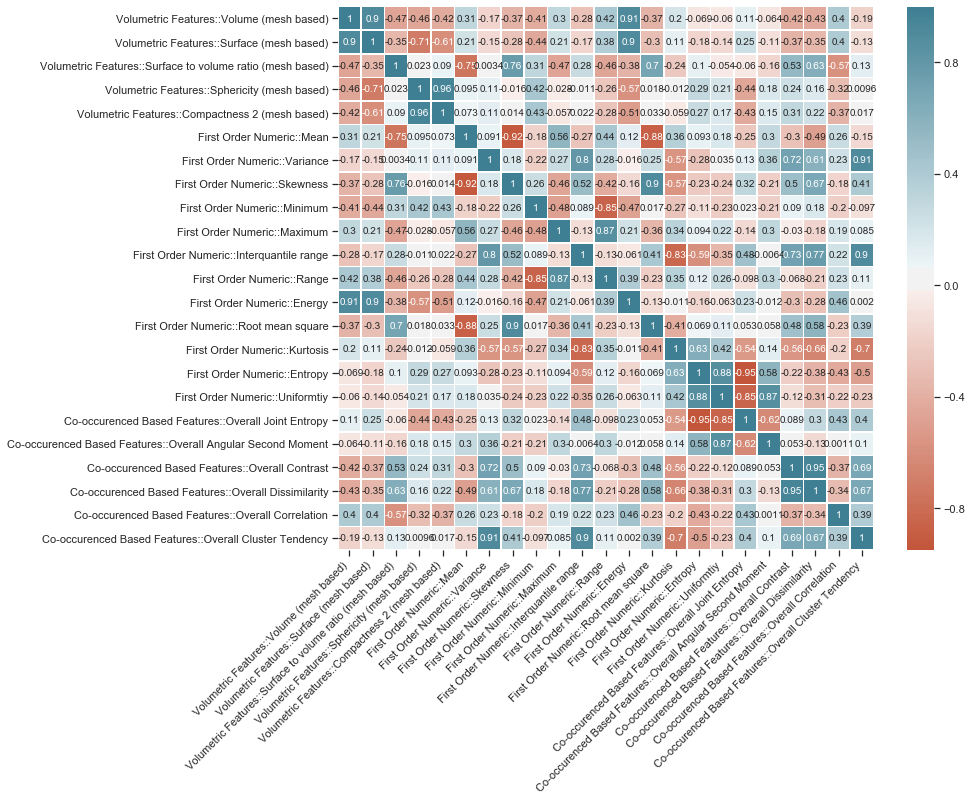

In [8]:
#----------------------- Feature correlation matrix
#Visualize matrix in order an expert can find redundant information
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df[df.columns[2:-1]].corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200),linewidths=.5)#cmap="RdBu"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#plt.savefig("foo.png", bbox_inches='tight', dpi=600)
plt.show()



# Statistical tests
## 1st:  normality test check
## 2nd: (non) parametric statistical hypothesis test
### all test conducted at 10%

# Shapiro–Wilk normality test

In [10]:
feature_names = df.columns[2:-1].values
diag = df['Diagnosis'].values.reshape(-1,1)
alpha = 0.1
W_shapiro = []
p_shapiro = []


 Test Hipótesis feature:  Volumetric Features::Volume (mesh based)


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

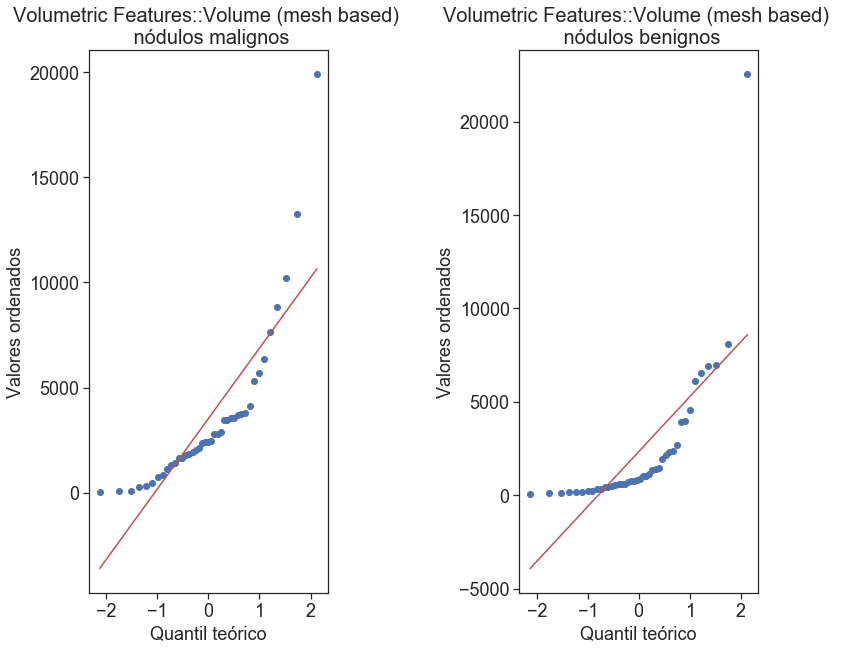


 Test Hipótesis feature:  Volumetric Features::Surface (mesh based)


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

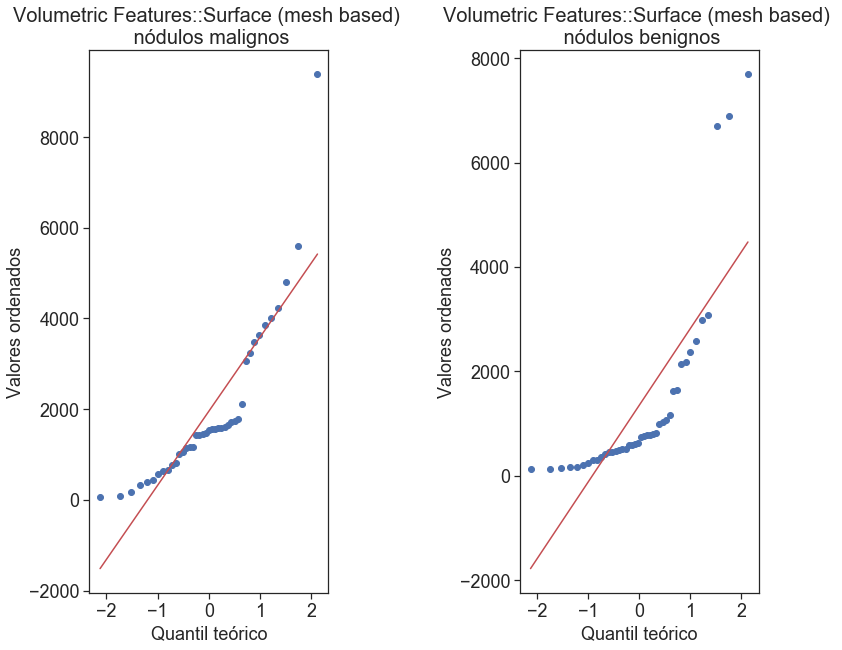


 Test Hipótesis feature:  Volumetric Features::Surface to volume ratio (mesh based)


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

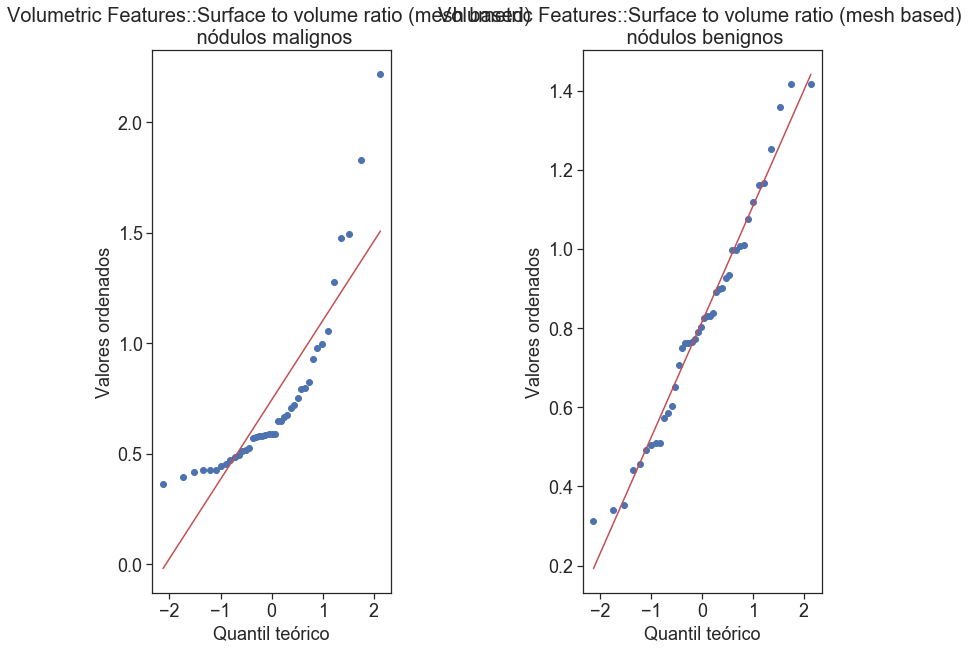


 Test Hipótesis feature:  Volumetric Features::Sphericity (mesh based)


<span style="color: #008000">Feature maligno ~ gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

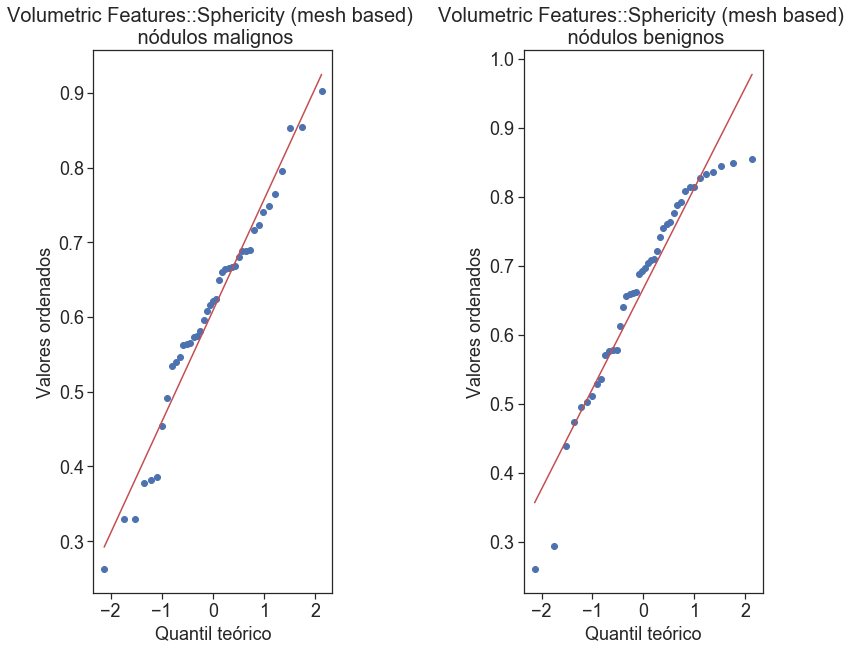


 Test Hipótesis feature:  Volumetric Features::Compactness 2 (mesh based)


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

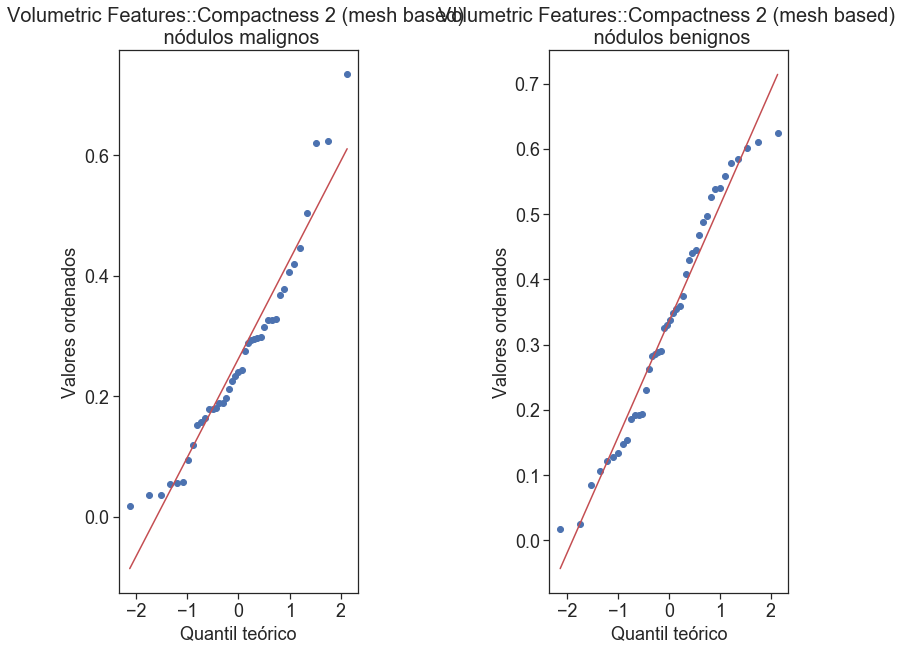


 Test Hipótesis feature:  First Order Numeric::Mean


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

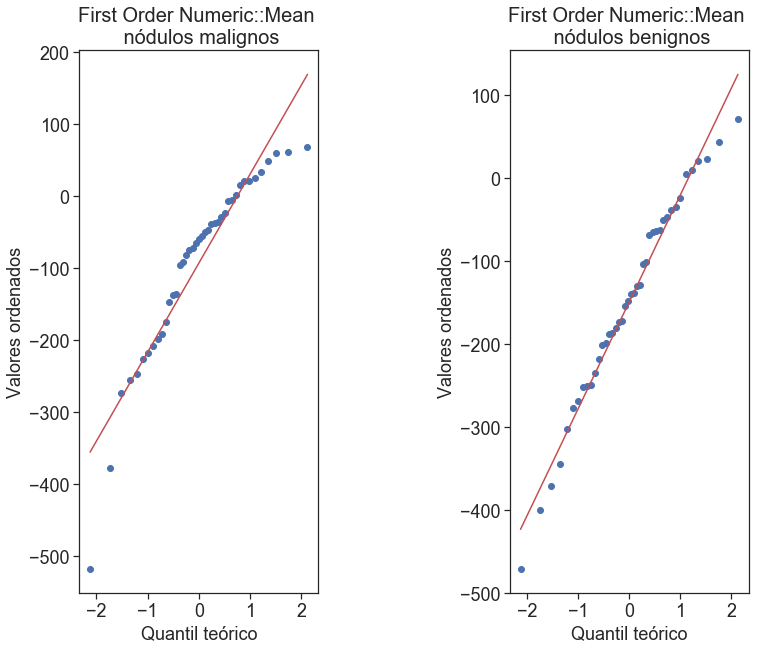


 Test Hipótesis feature:  First Order Numeric::Variance


<span style="color: #008000">Feature maligno ~ gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

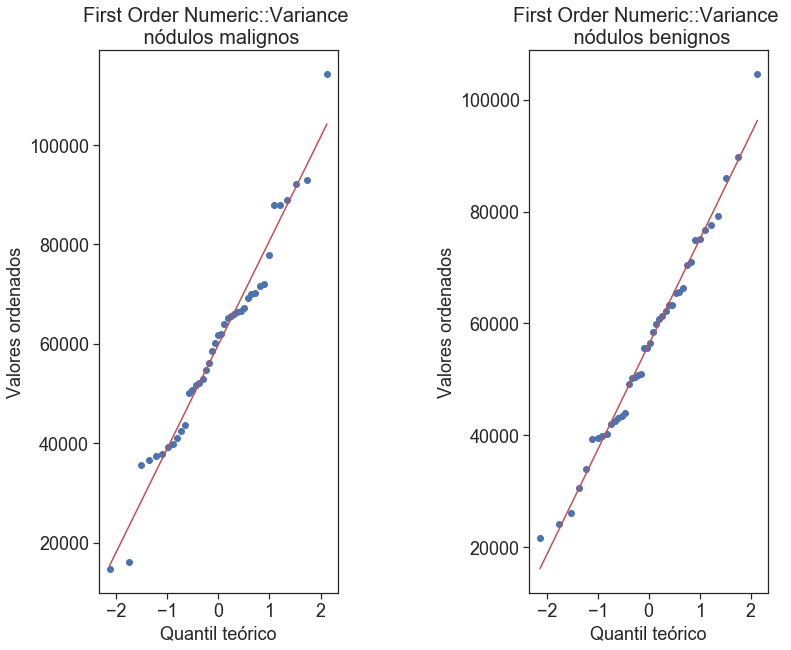


 Test Hipótesis feature:  First Order Numeric::Skewness


<span style="color: #008000">Feature maligno ~ gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

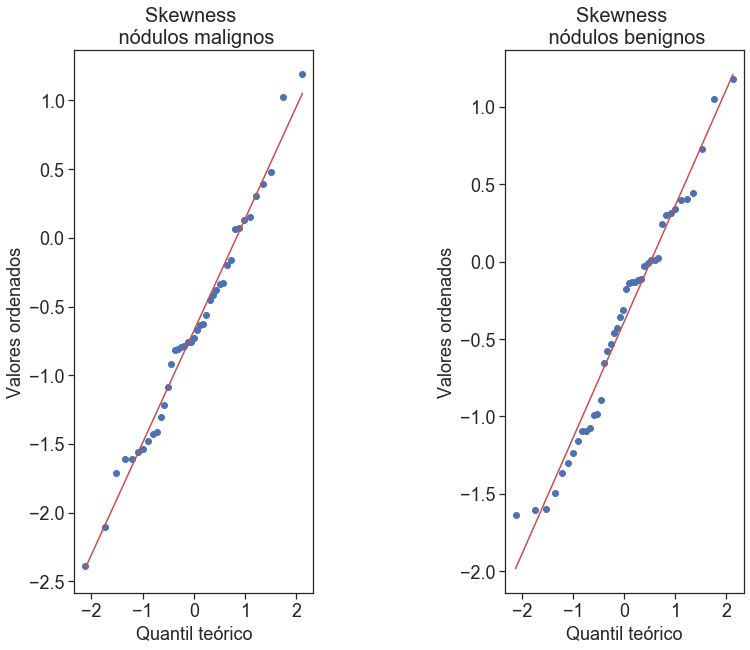


 Test Hipótesis feature:  First Order Numeric::Minimum


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

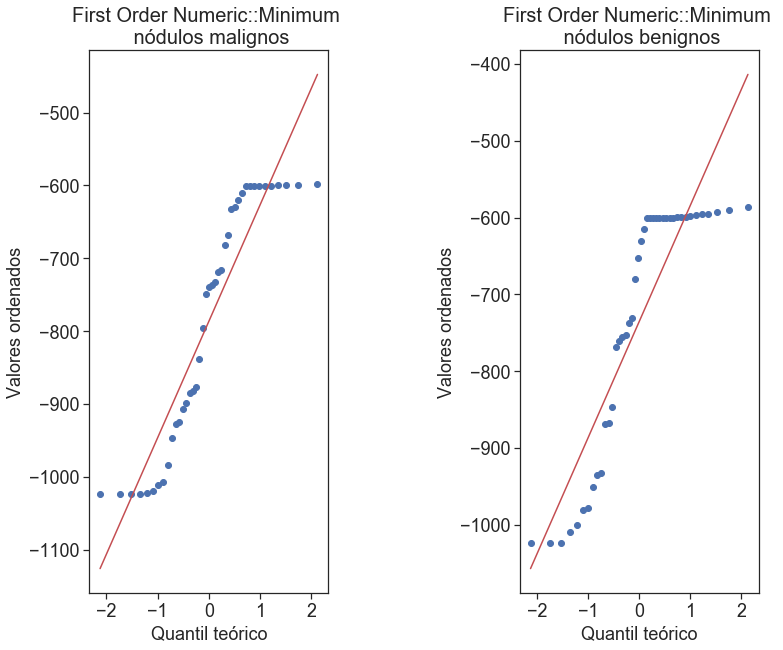


 Test Hipótesis feature:  First Order Numeric::Maximum


<span style="color: #008000">Feature maligno ~ gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

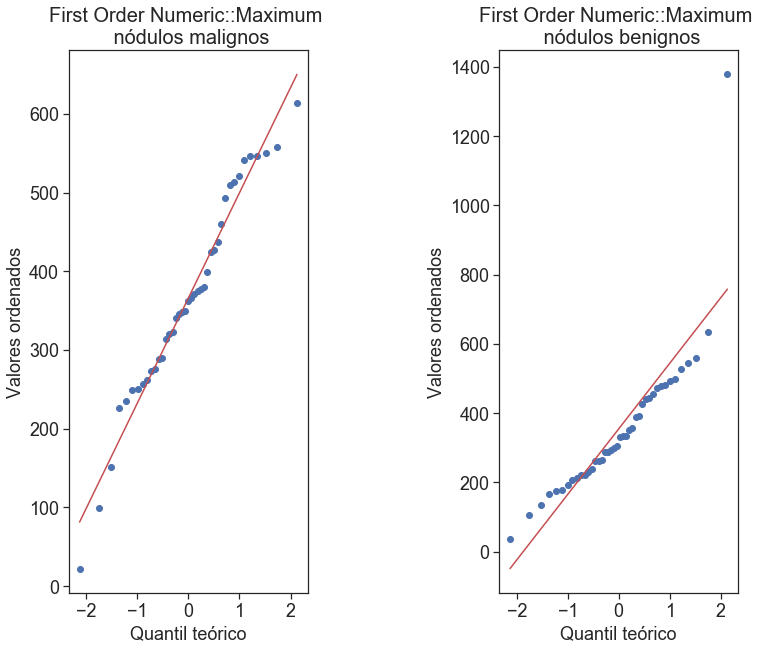


 Test Hipótesis feature:  First Order Numeric::Interquantile range


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

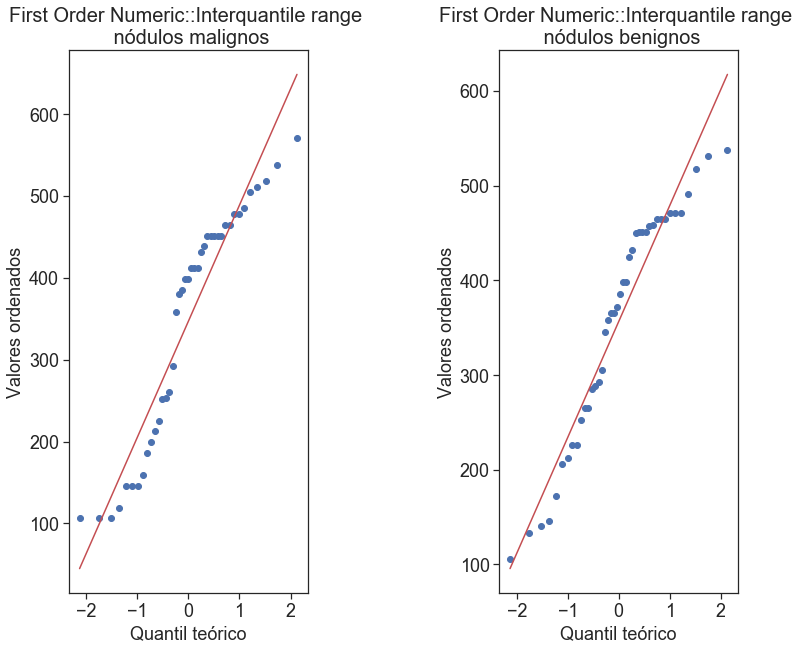


 Test Hipótesis feature:  First Order Numeric::Range


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

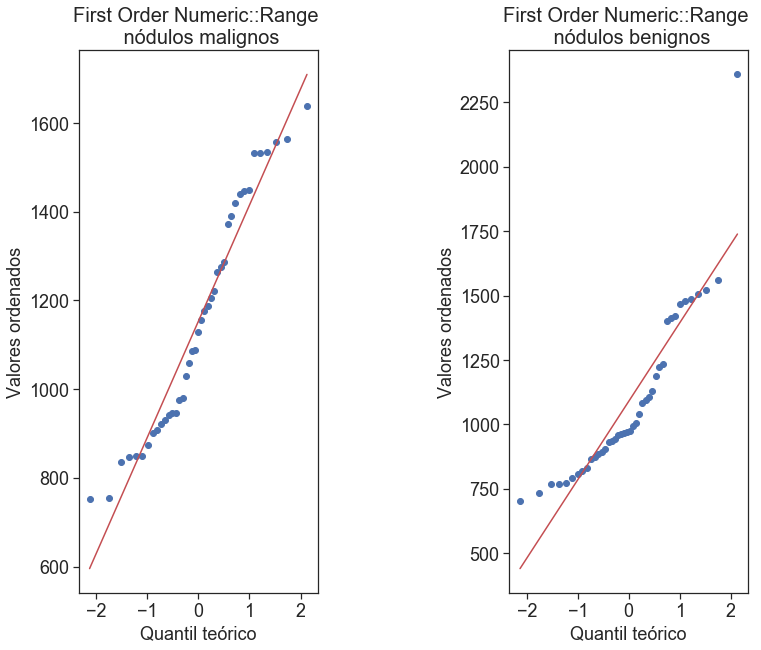


 Test Hipótesis feature:  First Order Numeric::Energy


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

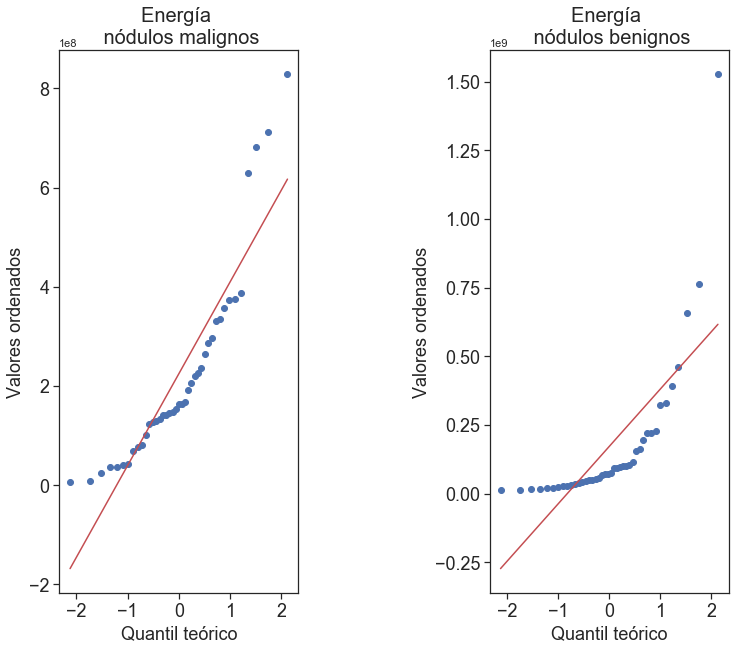


 Test Hipótesis feature:  First Order Numeric::Root mean square


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

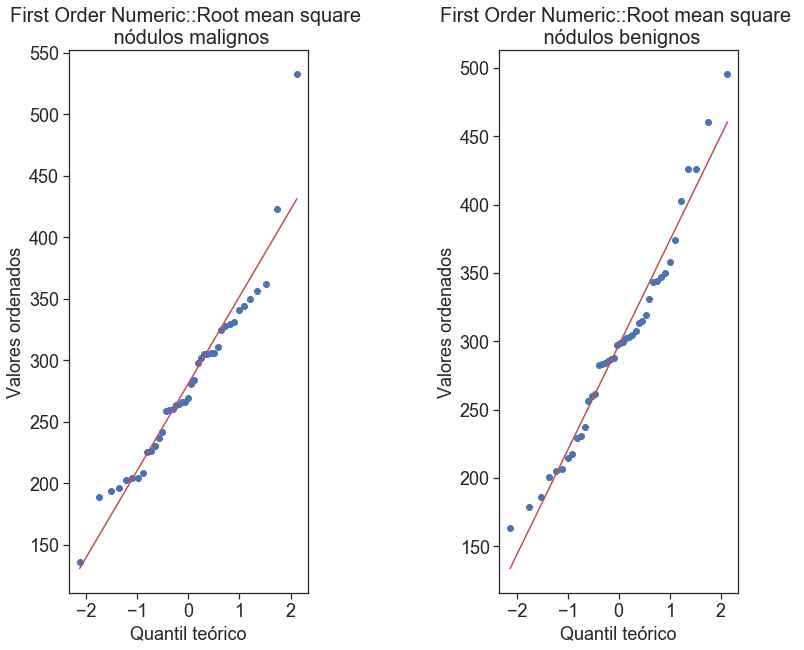


 Test Hipótesis feature:  First Order Numeric::Kurtosis


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

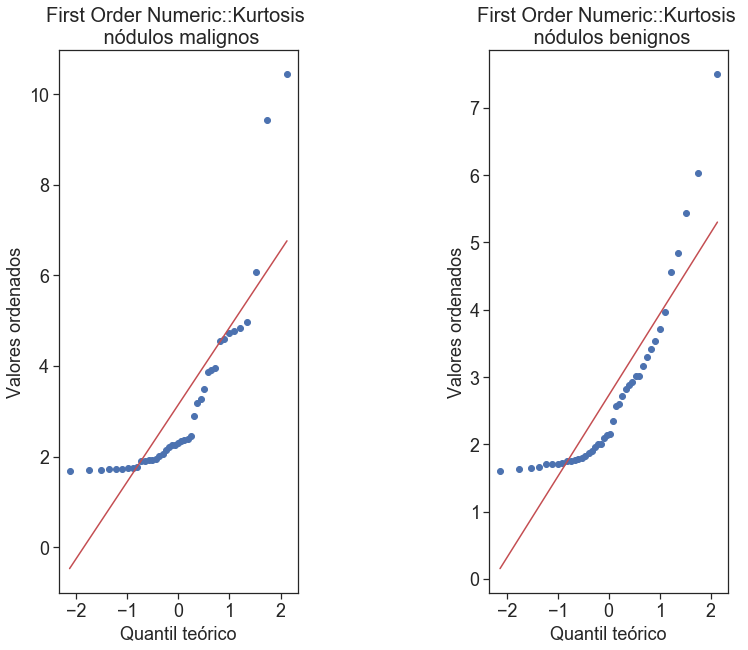


 Test Hipótesis feature:  First Order Numeric::Entropy


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

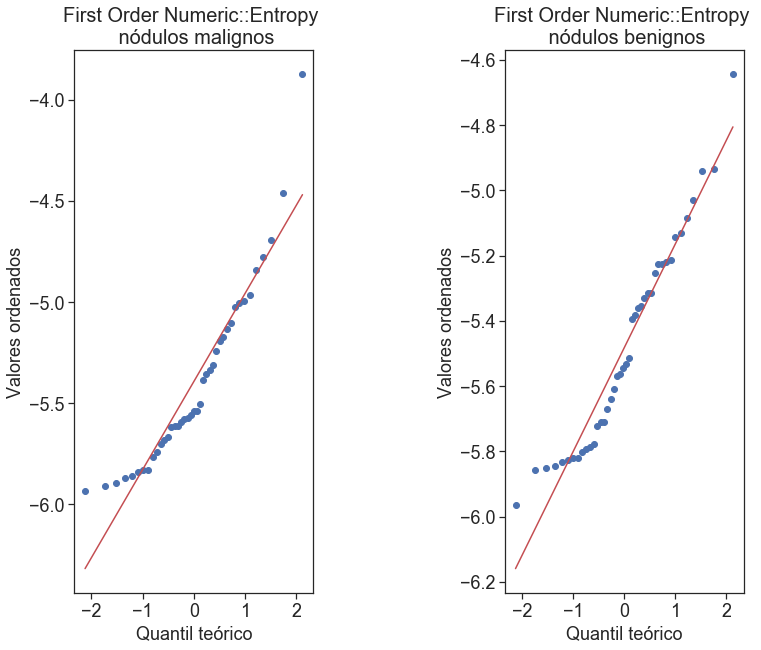


 Test Hipótesis feature:  First Order Numeric::Uniformtiy


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

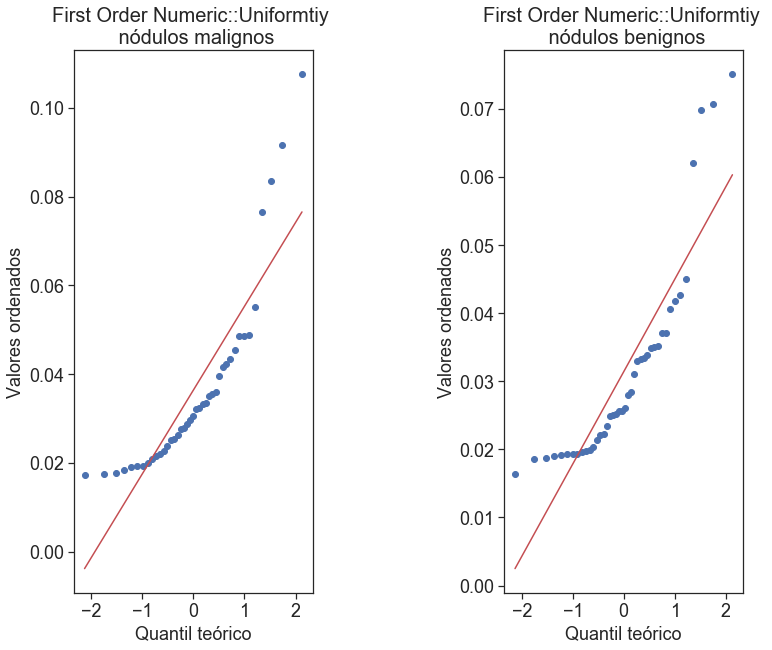


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Joint Entropy


<span style="color: #008000">Feature maligno ~ gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

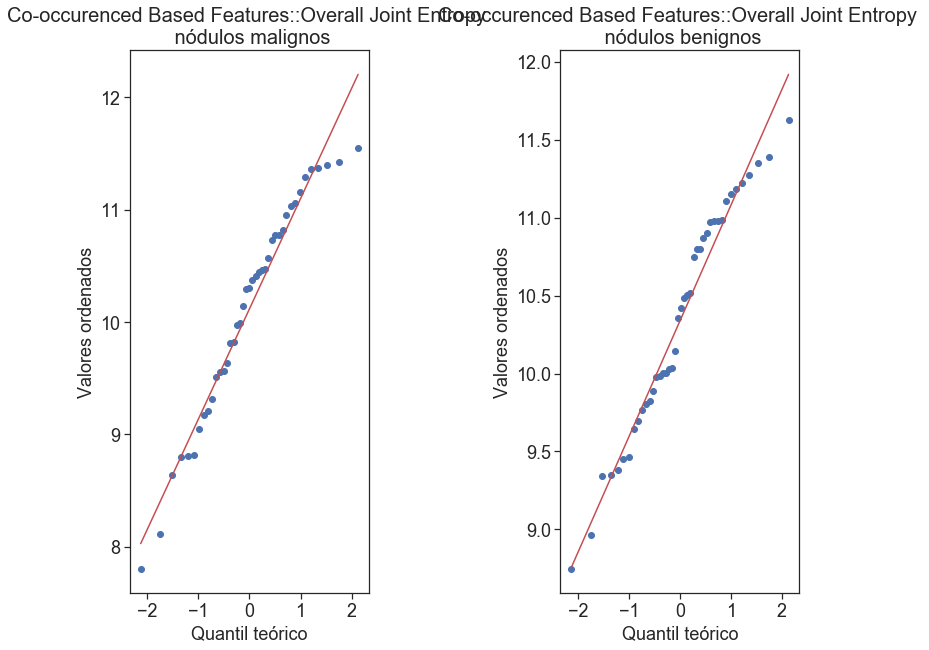


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Angular Second Moment


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

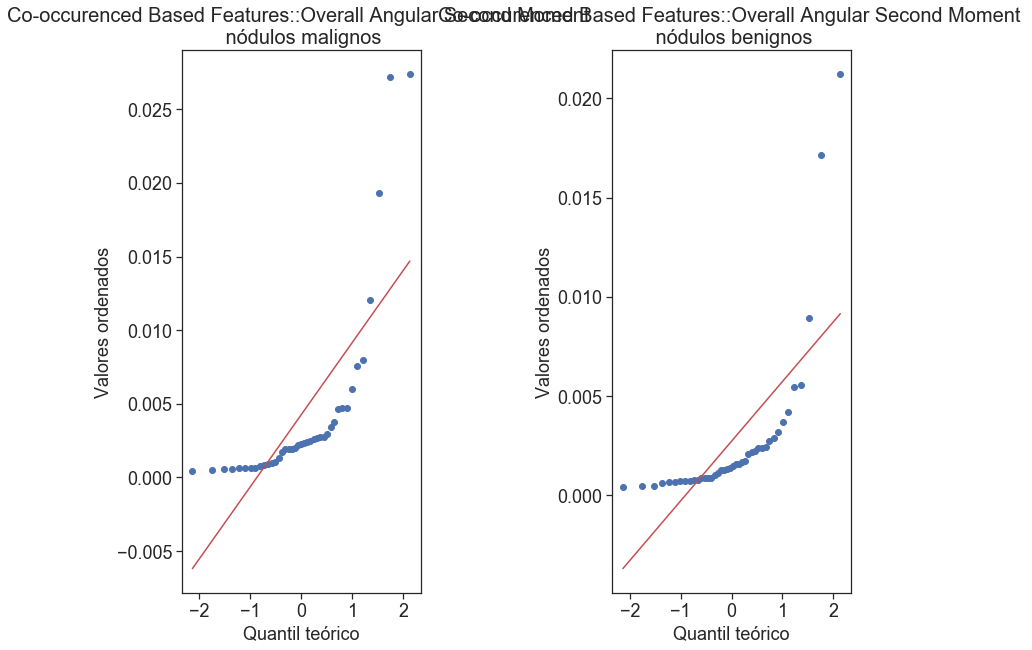


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Contrast


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

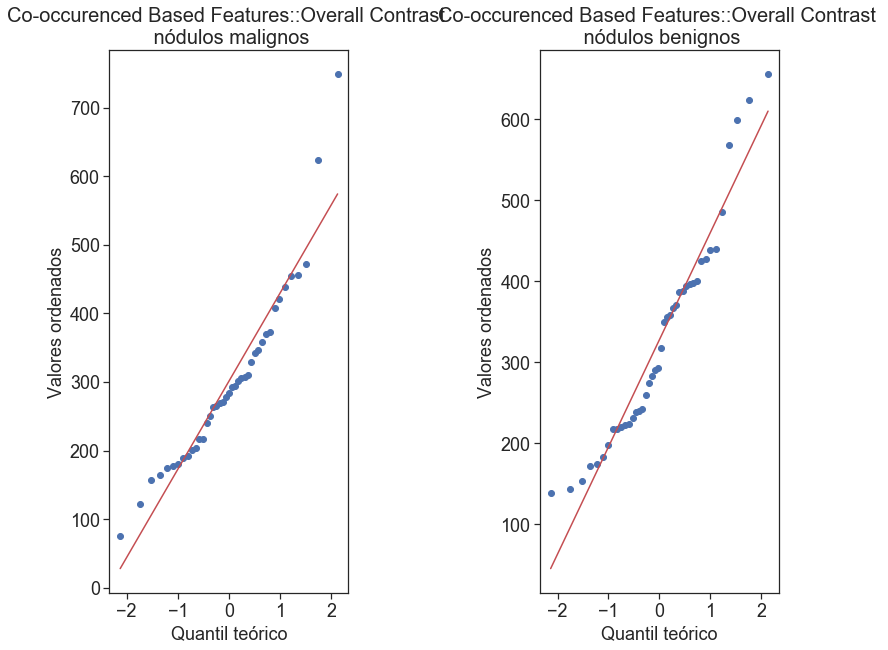


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Dissimilarity


<span style="color: #008000">Feature maligno ~ gaussiano</span>

<span style="color: #ff0000">Feature benigno No gaussiano</span>

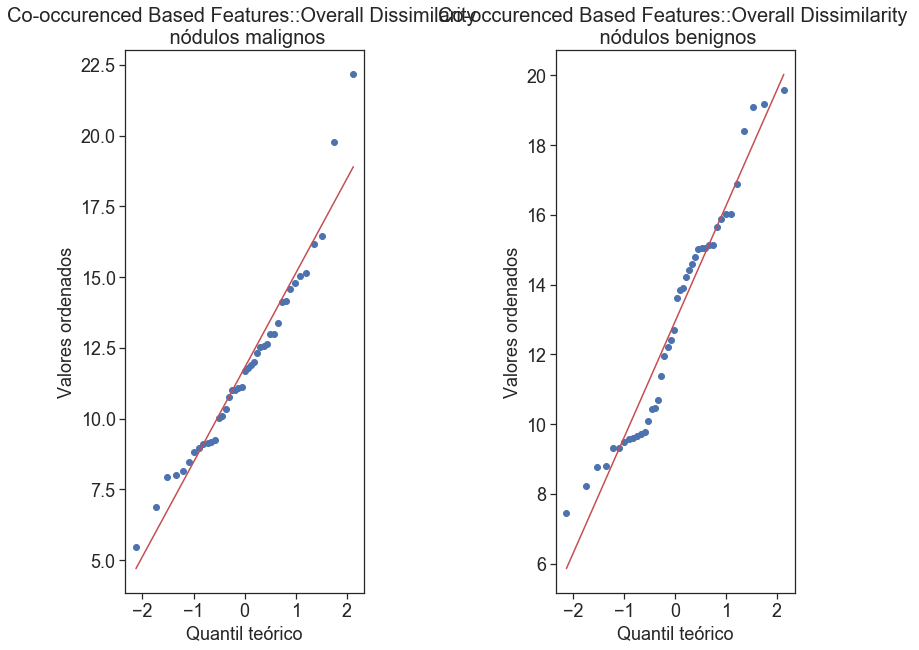


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Correlation


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

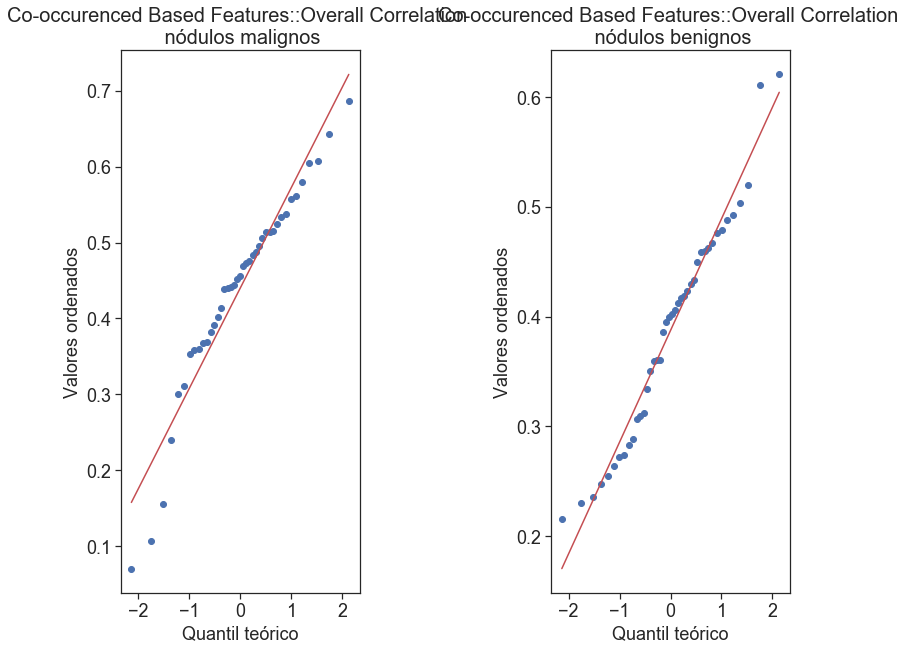


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Cluster Tendency


<span style="color: #ff0000">Feature maligno No gaussiano</span>

<span style="color: #008000">Feature benigno ~ gaussiano</span>

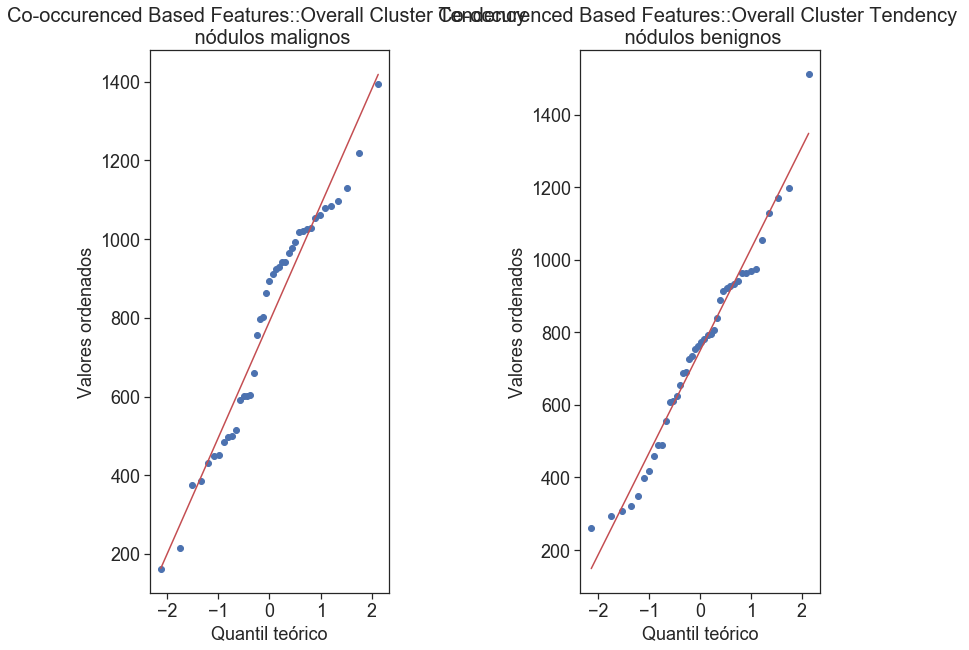

In [11]:
from scipy.stats import shapiro
from IPython.display import Markdown
import scipy.stats as stats
import pylab
import numpy as np
for name in feature_names:
    print('\n Test Hipótesis feature: ',name)
    feature = df[name].values.reshape(-1,1)
    feature_m = []
    feature_b = []
    for i in range(diag.size):
        if diag[i] == 1:
            feature_m.append(feature[i])
        elif diag[i] == 0:
            feature_b.append(feature[i])
    feature_m = np.asarray(feature_m)
    feature_b = np.asarray(feature_b)
    W1,p1 = shapiro(feature_m)
    W2,p2 = shapiro(feature_b)
    W_shapiro.append([W1,W2])
    p_shapiro.append([p1,p2])
    if p1 > alpha:
        display (Markdown('<span style="color: #008000">Feature maligno ~ gaussiano</span>'))
    else:
        display (Markdown('<span style="color: #ff0000">Feature maligno No gaussiano</span>'))
    if p2 > alpha:
        display (Markdown('<span style="color: #008000">Feature benigno ~ gaussiano</span>'))
    else:
         display (Markdown('<span style="color: #ff0000">Feature benigno No gaussiano</span>'))
    fig = plt.figure(figsize=(12, 10))
    ax1 = fig.add_subplot(1,2,1)
    stats.probplot(feature_m[:,0], dist="norm", plot=pylab)
    ax1.title.set_text(name+' \n nódulos malignos')
    ax1.set_xlabel('Quantil teórico',fontsize=18)
    ax1.set_ylabel('Valores ordenados',fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(name+' \n nódulos malignos',fontsize=20)
    ax2 = fig.add_subplot(1,2,2)
    stats.probplot(feature_b[:,0], dist="norm", plot=pylab)
    ax2.title.set_text(name+' \n nódulos benignos')
    ax2.set_xlabel('Quantil teórico',fontsize=18)
    ax2.set_ylabel('Valores ordenados',fontsize=18)
    plt.title(name+' \n nódulos benignos',fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.subplots_adjust(wspace = 0.8)
    if name in 'First Order Numeric::Skewness' :
        ax1.title.set_text('Skewness \n nódulos malignos')
        ax2.title.set_text('Skewness \n nódulos benignos')
        #plt.savefig("QQ_skewness.png", bbox_inches='tight', dpi=600)
    if name in 'First Order Numeric::Energy' :
        ax1.title.set_text('Energía \n nódulos malignos')
        ax2.title.set_text('Energía \n nódulos benignos')
        #plt.savefig("QQ_Energy.png", bbox_inches='tight', dpi=600)
    plt.show()
    
        

#  non-parametric statistical hypothesis test

### Wilcoxon rank sum test: used to compare two samples that have been drawn from independent populations.

In [12]:
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import ranksums
from IPython.display import Markdown
import numpy as np
import math
print('Test de Hipótesis realizado con significancia al ',alpha*100,'%')
feature_signif = []
alpha =  0.1
T_hip = []
p_hip = []
for name in feature_names:
    print('\n Test Hipótesis feature: ',name)
    feature = df[name].values.reshape(-1,1)
    feature_m = []
    feature_b = []
    for i in range(diag.size):
        if diag[i] == 1:
            feature_m.append(feature[i])
        elif diag[i] == 0:
            feature_b.append(feature[i])
    feature_m = np.asarray(feature_m)
    feature_b = np.asarray(feature_b)
    ttest,pval = ranksums(feature_m, feature_b)#wilcoxon(feature_m[:,0], feature_b[0:-1,0])#ttest_ind(feature_m,feature_b)
    T_hip.append(ttest)
    p_hip.append(pval)
    print("p-value",pval)
    if pval < alpha:
        display (Markdown('<span style="color: #008000">Se rechaza H0</span>'))
        fm = np.asarray(feature_m)
        fb = np.asarray(feature_b)
        #plt.figure()
        #plt.hist(fm,bins=math.ceil(np.sqrt(fm.size)))
        #plt.hist(fb,bins=math.ceil(np.sqrt(fb.size)))
        #plt.show()
        feature_signif.append(name)
    else:
        display (Markdown('<span style="color: #ff0000">No es posible rechazar H0</span>'))

Test de Hipótesis realizado con significancia al  10.0 %

 Test Hipótesis feature:  Volumetric Features::Volume (mesh based)
p-value 0.009948000244590303


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  Volumetric Features::Surface (mesh based)
p-value 0.007016951962125008


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  Volumetric Features::Surface to volume ratio (mesh based)
p-value 0.037831248086469524


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  Volumetric Features::Sphericity (mesh based)
p-value 0.05462609761311758


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  Volumetric Features::Compactness 2 (mesh based)
p-value 0.05462609761311758


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  First Order Numeric::Mean
p-value 0.030176888945465195


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  First Order Numeric::Variance
p-value 0.4020543115839411


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  First Order Numeric::Skewness
p-value 0.08352931371094352


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  First Order Numeric::Minimum
p-value 0.06645975397354024


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  First Order Numeric::Maximum
p-value 0.24367325312882804


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  First Order Numeric::Interquantile range
p-value 0.8447454719280021


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  First Order Numeric::Range
p-value 0.15271888894261088


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  First Order Numeric::Energy
p-value 0.009188598273159921


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  First Order Numeric::Root mean square
p-value 0.3297678706070071


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  First Order Numeric::Kurtosis
p-value 0.3252680634589281


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  First Order Numeric::Entropy
p-value 0.5660902618168498


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  First Order Numeric::Uniformtiy
p-value 0.31200948885162605


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Joint Entropy
p-value 0.3720674558391288


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Angular Second Moment
p-value 0.1607156345675561


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Contrast
p-value 0.35760823540611075


<span style="color: #ff0000">No es posible rechazar H0</span>


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Dissimilarity
p-value 0.0955526501057531


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Correlation
p-value 0.011941312333061784


<span style="color: #008000">Se rechaza H0</span>


 Test Hipótesis feature:  Co-occurenced Based Features::Overall Cluster Tendency
p-value 0.3033711478683033


<span style="color: #ff0000">No es posible rechazar H0</span>

In [13]:
# List of features H0 is rejected : The samples differ
#for i in range(len(T_hip)):
#    print( '%.3E' %p_hip[i])
print('Se rechaza H0 para los features\n')
print(*feature_signif, sep = "\n") 

Se rechaza H0 para los features

Volumetric Features::Volume (mesh based)
Volumetric Features::Surface (mesh based)
Volumetric Features::Surface to volume ratio (mesh based)
Volumetric Features::Sphericity (mesh based)
Volumetric Features::Compactness 2 (mesh based)
First Order Numeric::Mean
First Order Numeric::Skewness
First Order Numeric::Minimum
First Order Numeric::Energy
Co-occurenced Based Features::Overall Dissimilarity
Co-occurenced Based Features::Overall Correlation


# Confidence interval feature c/clase - bootstrap

In [16]:
from numpy.random import choice
import numpy as np
import seaborn as sns


 Feature:  Volumetric Features::Volume (mesh based)


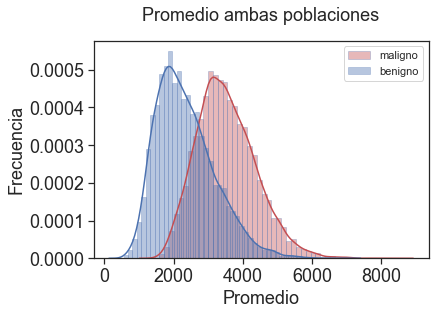

Nódulo maligno: (2252.560, 5033.181)
Nódulo benigno: (1221.183, 3914.474)

 Feature:  Volumetric Features::Surface (mesh based)


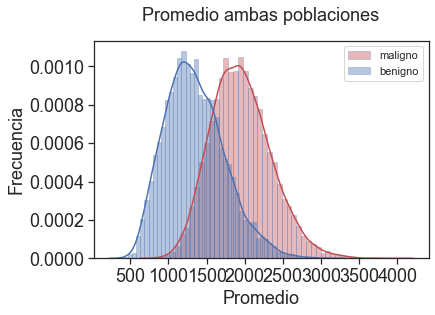

Nódulo maligno: (1357.340, 2638.037)
Nódulo benigno: (772.401, 2050.515)

 Feature:  Volumetric Features::Surface to volume ratio (mesh based)


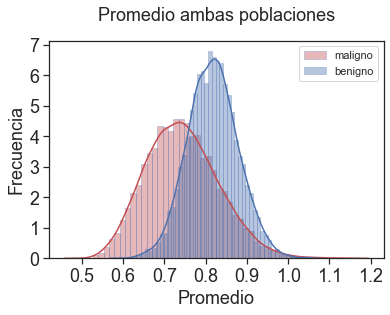

Nódulo maligno: (0.609, 0.896)
Nódulo benigno: (0.719, 0.919)

 Feature:  Volumetric Features::Sphericity (mesh based)


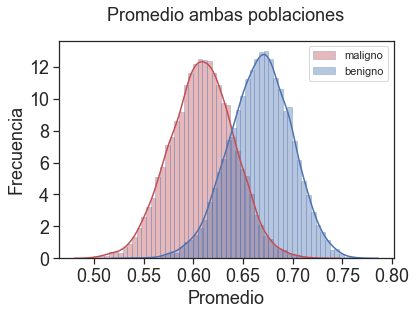

Nódulo maligno: (0.555, 0.660)
Nódulo benigno: (0.615, 0.717)

 Feature:  Volumetric Features::Compactness 2 (mesh based)


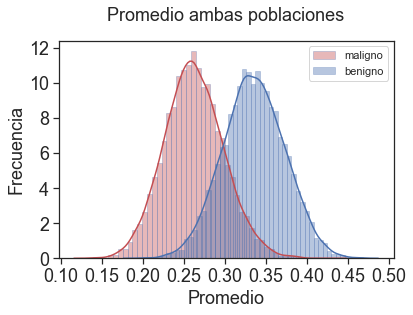

Nódulo maligno: (0.204, 0.324)
Nódulo benigno: (0.274, 0.397)

 Feature:  First Order Numeric::Mean


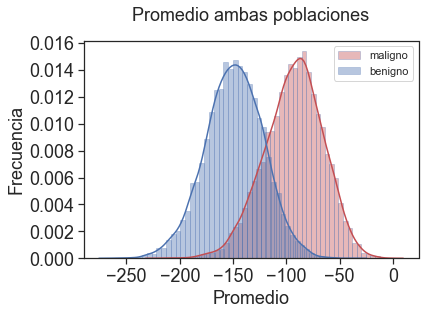

Nódulo maligno: (-140.305, -50.453)
Nódulo benigno: (-194.144, -105.476)

 Feature:  First Order Numeric::Variance
Nódulo maligno: (52285.406, 67315.788)
Nódulo benigno: (49787.177, 62711.591)

 Feature:  First Order Numeric::Skewness


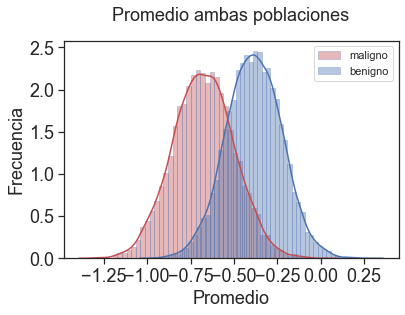

Nódulo maligno: (-0.966, -0.386)
Nódulo benigno: (-0.648, -0.127)

 Feature:  First Order Numeric::Minimum


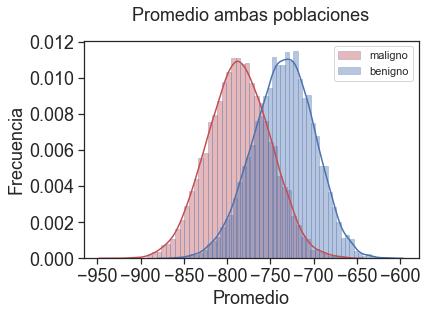

Nódulo maligno: (-846.173, -727.159)
Nódulo benigno: (-794.358, -679.357)

 Feature:  First Order Numeric::Maximum
Nódulo maligno: (316.590, 412.831)
Nódulo benigno: (287.023, 435.772)

 Feature:  First Order Numeric::Interquantile range
Nódulo maligno: (294.061, 398.496)
Nódulo benigno: (313.319, 399.294)

 Feature:  First Order Numeric::Range
Nódulo maligno: (1058.697, 1247.796)
Nódulo benigno: (981.583, 1207.557)

 Feature:  First Order Numeric::Energy


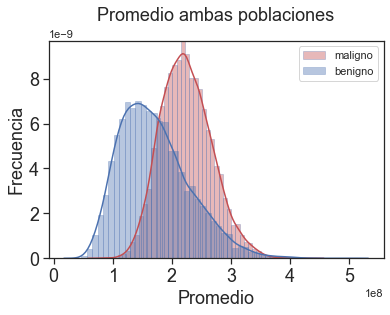

Nódulo maligno: (158746422.000, 298678587.000)
Nódulo benigno: (90748813.333, 279810293.333)

 Feature:  First Order Numeric::Root mean square
Nódulo maligno: (255.879, 308.346)
Nódulo benigno: (270.430, 324.401)

 Feature:  First Order Numeric::Kurtosis
Nódulo maligno: (2.493, 3.912)
Nódulo benigno: (2.290, 3.247)

 Feature:  First Order Numeric::Entropy
Nódulo maligno: (-5.546, -5.225)
Nódulo benigno: (-5.594, -5.367)

 Feature:  First Order Numeric::Uniformtiy
Nódulo maligno: (0.030, 0.045)
Nódulo benigno: (0.027, 0.037)

 Feature:  Co-occurenced Based Features::Overall Joint Entropy
Nódulo maligno: (9.755, 10.460)
Nódulo benigno: (10.076, 10.593)

 Feature:  Co-occurenced Based Features::Overall Angular Second Moment
Nódulo maligno: (0.002, 0.007)
Nódulo benigno: (0.002, 0.004)

 Feature:  Co-occurenced Based Features::Overall Contrast
Nódulo maligno: (256.026, 351.469)
Nódulo benigno: (281.203, 375.122)

 Feature:  Co-occurenced Based Features::Overall Dissimilarity


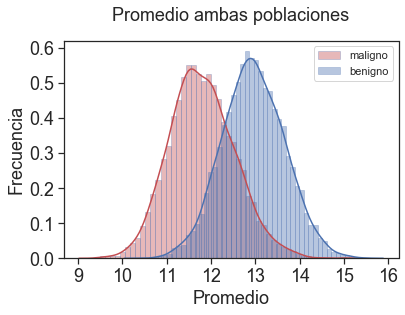

Nódulo maligno: (10.660, 13.038)
Nódulo benigno: (11.821, 14.119)

 Feature:  Co-occurenced Based Features::Overall Correlation


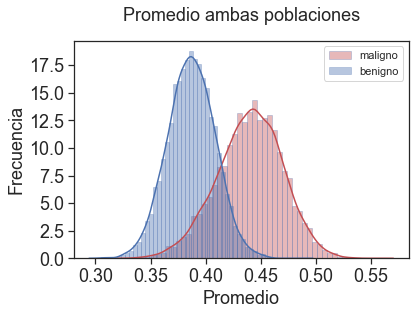

Nódulo maligno: (0.389, 0.487)
Nódulo benigno: (0.352, 0.422)

 Feature:  Co-occurenced Based Features::Overall Cluster Tendency
Nódulo maligno: (683.722, 896.765)
Nódulo benigno: (651.400, 848.484)


In [17]:
for name in feature_names:
    sample_benign_mean = []
    sample_malign_mean = []
    print('\n Feature: ',name)
    feature = df[name].values.reshape(-1,1)
    feature_m = []
    feature_b = []
    for i in range(diag.size):
        if diag[i] == 1:
            feature_m.append(feature[i])
        elif diag[i] == 0:
            feature_b.append(feature[i])
    feature_m = np.asarray(feature_m)
    feature_b = np.asarray(feature_b)
    for i in range(10**4):
        size_m = int(len(feature_m)*0.5)
        size_b = int(len(feature_b)*0.5)
        sample_mean = choice(feature_m[:,0],size=size_m,replace = True).mean()
        sample_malign_mean.append(sample_mean)
        sample_mean = choice(feature_b[:,0],size=size_b,replace = True).mean()
        sample_benign_mean.append(sample_mean)
    malign_lower = np.percentile(a = sample_malign_mean,q = 5)
    malign_upper = np.percentile(a = sample_malign_mean,q = 95)
    benign_lower = np.percentile(a = sample_benign_mean,q = 5)
    benign_upper = np.percentile(a = sample_benign_mean,q = 95)
    if name in feature_signif:
        plt.figure()
        sns.distplot(sample_malign_mean, color='r', kde=True, hist_kws=dict(edgecolor="b", linewidth=.675),label='maligno')
        sns.distplot(sample_benign_mean, color='b', kde=True, hist_kws=dict(edgecolor="b", linewidth=.675),label='benigno')
        plt.xlabel('Promedio',fontsize=18)
        plt.ylabel('Frecuencia',fontsize=18)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.title('Promedio ambas poblaciones',fontsize=18,pad=20)
        plt.legend()
        #if name in 'First Order Numeric::Energy':
        #    plt.savefig("IC_energy.png", bbox_inches='tight', dpi=600)
        plt.show()
    print('Nódulo maligno: (%.3f'%malign_lower+', %.3f)'%malign_upper)#print('IC malign: (',malign_lower,', ',malign_upper,')')
    print('Nódulo benigno: (%.3f'%benign_lower+', %.3f)'%benign_upper)# print('IC benign: (',benign_lower,', ',benign_upper,')')
    

# Supervised ML to classify nodules based on features that show statistical difference

## Métricas de evaluación de modelos
- Relevancia clínica: Evitar decirle a alguien con cáncer que está sano
- Escoger una métrica para comparar: minimizar FN sin comprometer FP

    -precision (PPV) = tp / (tp + fp)
        Del total clasificado como sí, porcentaje que efectivamente es correcto
        La habilidad de no añadir FP
    -Recall(TPR) = tp / (tp + fn)
        De los casos realmente correctos, la fracción correctamente clasificada como correctos
    -FNR = fn/(tp+fn)
        Del total de personas que sí tienen la condición, fracción predicha como no
    -FOR = fn/(tn+fn)
        Del total predicho negativo, fracción que se equivocó
    -FPR = fp / (fp + tn)
        Fracción de falsas alarmas
    -FDR = fp / (tp + fp)
        De las clasificaciones como sí, porcentaje que efectivamente es falso
    -Classification Report: precision & recall cada clase
        recall clase positiva = sensibilidad (TPR)
        recall clase negativa = especificidad
        *precision clase positiva = PPV
        *precision clase negativa = NPV
    - Por minimizar: FN -> FNR y FOR
            -FNR = 1-TPR
            -FOR = 1-VPN
            -(FPR = 1-especificity -FDR = 1-PPV)
        - sklearn buscar: max Recall/precision clase negativa

## Cross validation
## Stratified KFold : data splitting asegura que se mantenga la proporcion de observaciones de cada variable categorica

### 1: Feature a feature

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


Evaluando precision en conjunto de entrenamiento feature:  Volumetric Features::Volume (mesh based) 

LR: 0.604902 (0.097726) - median 0.611111
KNN: 0.606601 (0.112004) - median 0.599673
DT: 0.557798 (0.116483) - median 0.562500
NB: 0.545163 (0.116343) - median 0.555556
SVM: 0.495882 (0.015009) - median 0.500000
Modelo con mayor scoring: KNN

Evaluando precision en conjunto de entrenamiento feature:  Volumetric Features::Surface (mesh based) 

LR: 0.578493 (0.100579) - median 0.562500
KNN: 0.670564 (0.100168) - median 0.687500
DT: 0.589395 (0.118271) - median 0.562500
NB: 0.547855 (0.118665) - median 0.562500
SVM: 0.542153 (0.042849) - median 0.555556
Modelo con mayor scoring: KNN

Evaluando precision en conjunto de entrenamiento feature:  Volumetric Features::Surface to volume ratio (mesh based) 

LR: 0.628754 (0.097686) - median 0.625000
KNN: 0.603525 (0.099695) - median 0.599673
DT: 0.587034 (0.102049) - median 0.599673
NB: 0.565237 (0.117742) - median 0.562500
SVM: 0.677014 (0.093

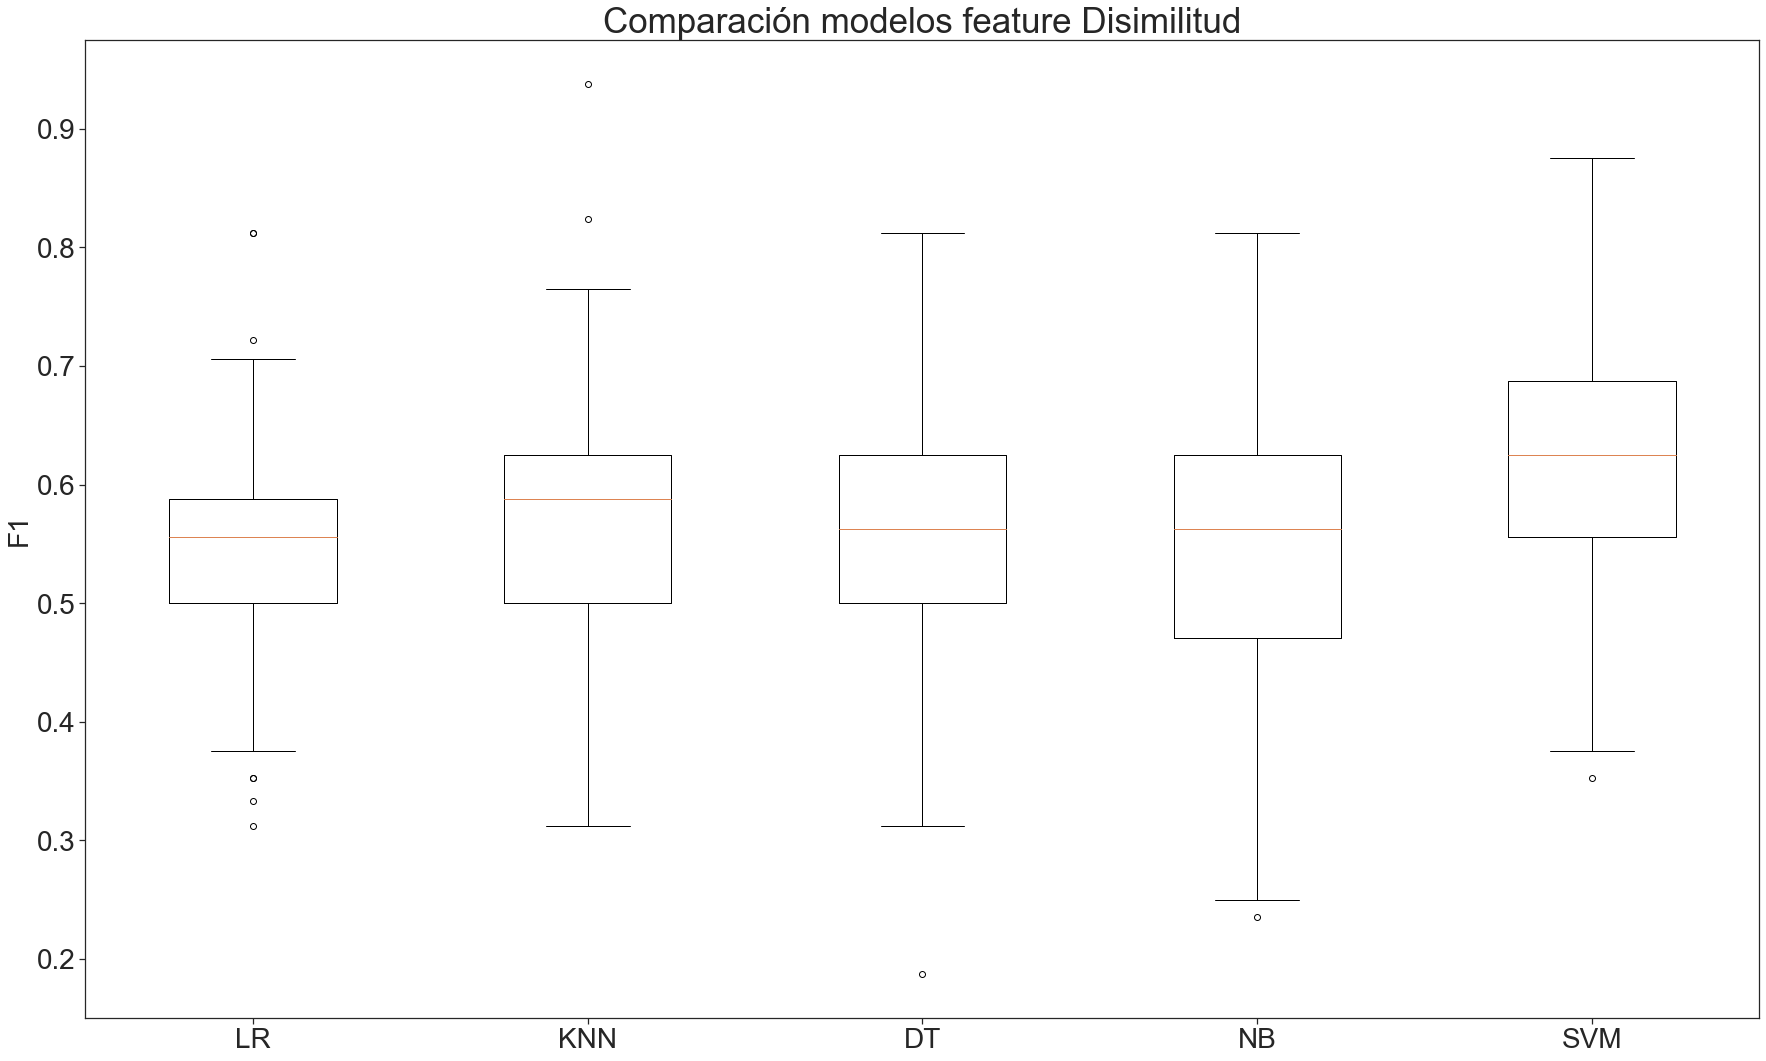


Evaluando precision en conjunto de entrenamiento feature:  Co-occurenced Based Features::Overall Correlation 

LR: 0.615931 (0.107536) - median 0.625000
KNN: 0.578154 (0.124063) - median 0.562500
DT: 0.560858 (0.100363) - median 0.562500
NB: 0.629600 (0.113617) - median 0.636029
SVM: 0.554175 (0.084836) - median 0.555556
Modelo con mayor scoring: NB


In [19]:
# Repeated stratified K-Fold
k = 5
repeated = 20 # num repeticiones
best_model = []# mejor modelo para cada feature 
best_value = []#valor del promedio de la metrica para el mejor modelo
best_results = np.ones((len(feature_signif),k*repeated))#valores de la metrica en cada fold del mejor modelo
model_entry = []
j = 0
for feature in feature_signif:
    results = []
    names = []
    X = np.asarray(df[feature])
    y = df['Diagnosis'].values
    #X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    print('\nEvaluando precision en conjunto de entrenamiento feature: ',feature, '\n')
    for name, model in models:
        kfold = StratifiedKFold(n_splits=k, random_state=4)
        kRfold= RepeatedStratifiedKFold(n_splits=k, n_repeats=repeated, random_state=0)
        cv_results = cross_val_score(model, X.reshape(-1,1), y, cv=kRfold, scoring='f1_micro')#f1_micro- recall_macro
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f) - median %f' % (name, cv_results.mean(), cv_results.std(), np.median(cv_results)))
    values = [np.mean(results[i]) for i in range(5)]
    print('Modelo con mayor scoring:',models[values.index(max(values))][0])
    model_entry.append(values.index(max(values)))
    best_model.append(models[values.index(max(values))][0])
    best_value.append(max(values))
    best_results[j] = results[values.index(max(values))]
    j = j+1
    #mostrar un grafico de ejemplo
    if feature in 'Co-occurenced Based Features::Overall Dissimilarity':
        %matplotlib inline
        plt.figure(figsize = (30, 18))
        plt.boxplot(results,labels = names)
        plt.title('Comparación modelos feature Disimilitud',fontsize=35)
        plt.ylabel('F1',fontsize=28)
        plt.xticks(fontsize=28)
        plt.yticks(fontsize=28)
        #plt.savefig("ML_modelos_Diss.png", bbox_inches='tight', dpi=600)
        plt.show()

## Choose feature w/the best metric 
## add features and classify w/more than 1 feature

In [24]:
#----------------auxiliary variables
# best feature/best model/metric value/repetition results
def getKey(item):
    return item[2]
F = [f for f,m,v,r in sorted(zip(feature_signif,best_model,best_value,best_results),key=getKey,reverse=True)]
M = [m for f,m,v,r in sorted(zip(feature_signif,best_model,best_value,best_results),key=getKey,reverse=True)]
V = [v for f,m,v,r in sorted(zip(feature_signif,best_model,best_value,best_results),key=getKey,reverse=True)]
RR = [r for f,m,v,r in sorted(zip(feature_signif,best_model,best_value,best_results),key=getKey,reverse=True)]

In [25]:
# sorted list best feature/model/metric value
F,M,V

(['Volumetric Features::Surface to volume ratio (mesh based)',
  'Volumetric Features::Surface (mesh based)',
  'First Order Numeric::Energy',
  'First Order Numeric::Mean',
  'Co-occurenced Based Features::Overall Correlation',
  'Co-occurenced Based Features::Overall Dissimilarity',
  'First Order Numeric::Skewness',
  'Volumetric Features::Volume (mesh based)',
  'Volumetric Features::Compactness 2 (mesh based)',
  'Volumetric Features::Sphericity (mesh based)',
  'First Order Numeric::Minimum'],
 ['SVM', 'KNN', 'KNN', 'LR', 'NB', 'SVM', 'LR', 'KNN', 'NB', 'KNN', 'NB'],
 [0.677013888888889,
  0.6705637254901959,
  0.6387091503267974,
  0.636797385620915,
  0.6295996732026143,
  0.6160294117647058,
  0.6083415032679739,
  0.6066013071895424,
  0.5997916666666666,
  0.5865645424836601,
  0.5512418300653595])

## Delete correlated features
### keep features w/best metric value

In [27]:
# list of values for features that classify the best
df[df[F].columns]

Volumetric Features::Surface to volume ratio (mesh based)  \
0                                            1.491760           
1                                            1.473740           
2                                            0.790440           
3                                            0.484536           
4                                            0.707839           
..                                                ...           
78                                           0.509056           
79                                           1.118880           
80                                           0.503546           
81                                           0.456227           
82                                           0.441499           

    Volumetric Features::Surface (mesh based)  First Order Numeric::Energy  \
0                                     83.9738                      6717870   
1                                    391.0320                     37281200   
2                                    578.9970                     81941200   
3                                   1661.4900                    142291000   
4                                   4019.2000                    388325000   
..                                        ...                          ...   
78                                   732.2550                     99301000   
79                                   505.0820                     45951500   
80                                  3075.6800                    324255000   
81                                  2975.8200                    226467000   
82                                  1020.7600                    153429000   

    First Order Numeric::Mean  \
0                   -174.6420   
1                   -247.2420   
2                   -207.8230   
3                    -35.9023   
4                    -95.4279   
..                        ...   
78                    43.5005   
79                  -217.3110   
80                   -49.6719   
81                    21.5329   
82                    71.4878   

    Co-occurenced Based Features::Overall Correlation  \
0                                            0.107216   
1                                            0.239798   
2                                            0.483173   
3                                            0.439143   
4                                            0.444282   
..                                                ...   
78                                           0.458754   
79                                           0.360267   
80                                           0.492650   
81                                           0.418602   
82                                           0.412550   

    Co-occurenced Based Features::Overall Dissimilarity  \
0                                            22.16000     
1                                            19.75600     
2                                            15.02320     
3                                             8.00060     
4                                            12.63120     
..                                                ...     
78                                           10.43860     
79                                           14.57820     
80                                            9.58484     
81                                            7.46763     
82                                            9.65104     

    First Order Numeric::Skewness  Volumetric Features::Volume (mesh based)  \
0                        0.068636                                   56.2917   
1                        0.481504                                  265.3330   
2                        0.129796                                  732.5000   
3                       -1.475380                                 3429.0400   
4                       -0.629274                                 5678.1200   
..                   

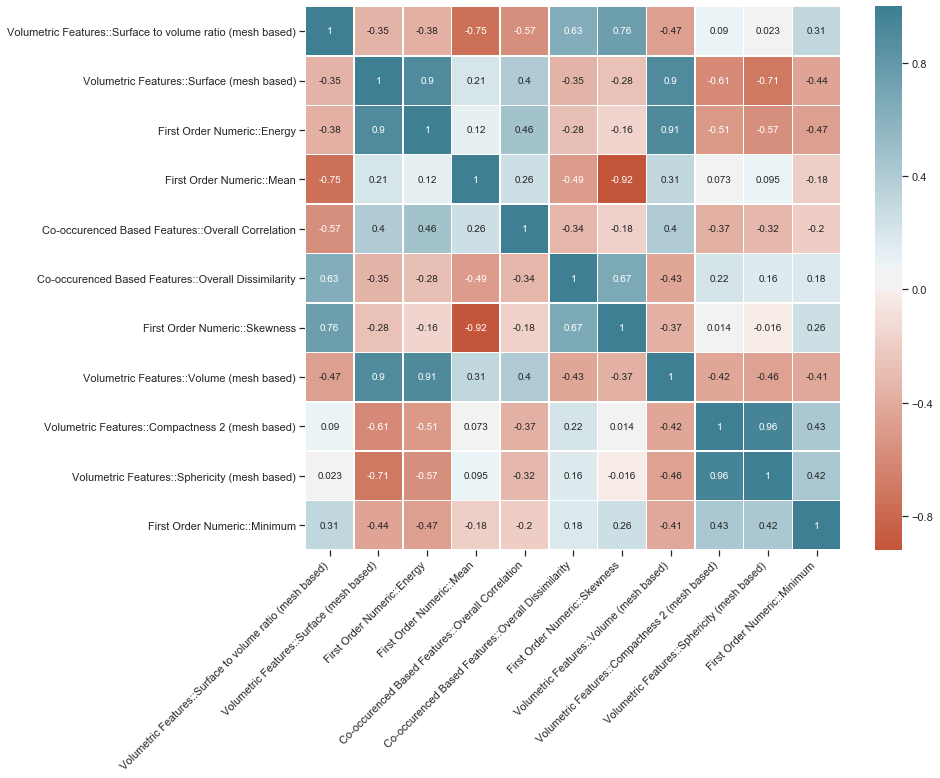

In [28]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df[df[F].columns].corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200),linewidths=.5)#cmap="RdBu"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#plt.savefig("Corr_matrix.png", bbox_inches='tight', dpi=600)
plt.show()

In [29]:
corr=df[df[F].columns].corr()
list_features = corr.columns.values

In [30]:
f = F[:]
for names in F:
    R = [f for f in abs(corr[names])>0.8 ]
    lista = list_features[R].tolist()
    lista.remove(names)
    for i in range(len(lista)):
        if lista[i] in F:
            F.remove(lista[i])

In [31]:
m = []
v = []
rr = np.ones((len(F),k*repeated))
for i in range(len(F)):
    m.append(M[f.index(F[i])])
    v.append(V[f.index(F[i])])    
    rr[i] = RR[f.index(F[i])]

In [32]:
print('Resultados Ajustes con Features individualmente\n')
for i in range(len(F)):
    print(F[i],'\t',m[i],'\t',v[i],'(',rr[i].std(),')','\n')

Resultados Ajustes con Features individualmente

Volumetric Features::Surface to volume ratio (mesh based) 	 SVM 	 0.677013888888889 ( 0.09301923664122677 ) 

Volumetric Features::Surface (mesh based) 	 KNN 	 0.6705637254901959 ( 0.10016820357868365 ) 

First Order Numeric::Mean 	 LR 	 0.636797385620915 ( 0.10188249636567229 ) 

Co-occurenced Based Features::Overall Correlation 	 NB 	 0.6295996732026143 ( 0.11361655868070569 ) 

Co-occurenced Based Features::Overall Dissimilarity 	 SVM 	 0.6160294117647058 ( 0.1011659442568098 ) 

Volumetric Features::Compactness 2 (mesh based) 	 NB 	 0.5997916666666666 ( 0.11382776346966612 ) 

First Order Numeric::Minimum 	 NB 	 0.5512418300653595 ( 0.11061761623661906 ) 



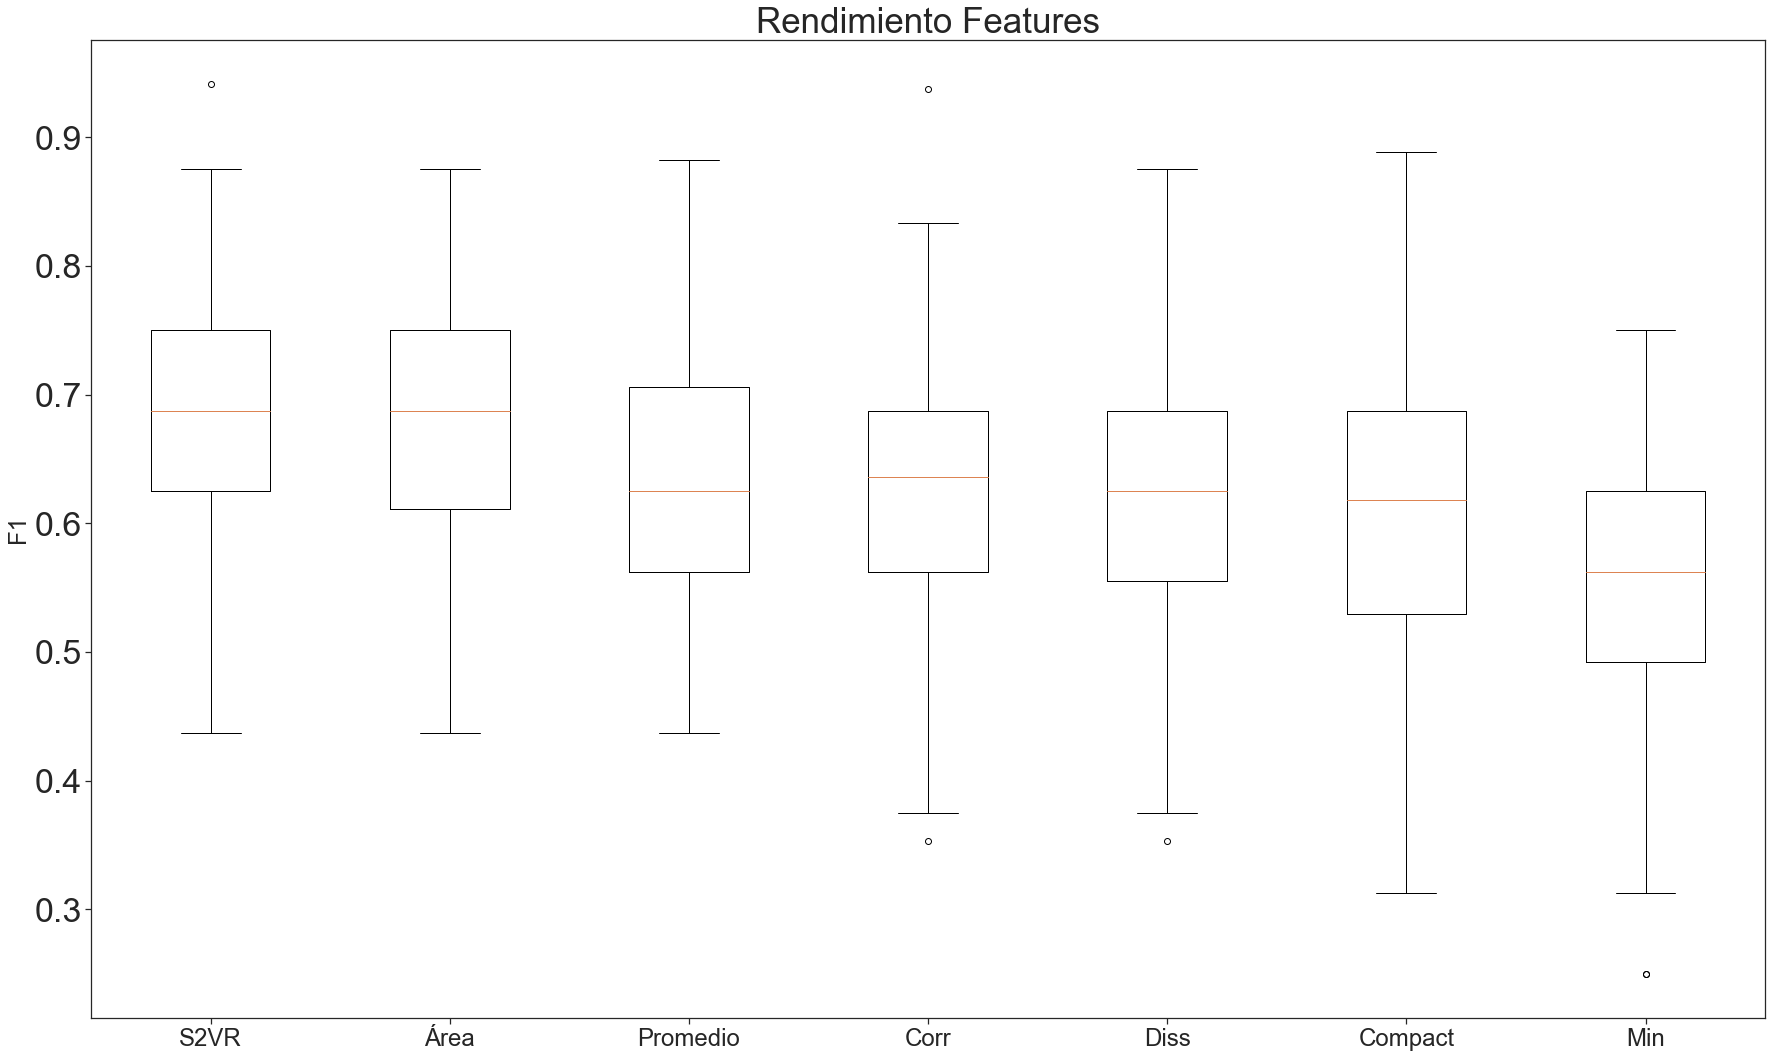

In [33]:
# plot univariate results
%matplotlib inline
var = rr.tolist()
plt.figure(figsize = (30, 18))
L = ['S2VR','Área','Promedio','Corr','Diss','Compact','Min']#umbral pearson 0.8
plt.boxplot(var,labels = L)
plt.title('Rendimiento Features',fontsize=35)
plt.ylabel('F1',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=34)
#plt.savefig("ML_features_indiv_boxplot.png", bbox_inches='tight', dpi=600)
plt.show()

# 2: Multivariate classification
## this replaces part 1

In [35]:
from itertools import combinations

In [36]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [37]:
#stratified cross-val
#iterate for every feature combination
y = df['Diagnosis'].values
k = 5
repeated = 20 # en caso de RepeatedStratifiedKFold
R = []
S = []
B = 2*np.ones((127,k*repeated))
jj = 0
features_used = []
for i in range(1,len(F)+1):
    c = np.asarray(list(set(combinations(F, i))))
    for j in range(len(c)):
        print('Evaluando modelos features: \n')
        print(*c[j],sep='\n')
        print('\n')
        results = []
        names = []
        X = np.asarray(df[c[j]])
        for name, model in models:
            kfold = StratifiedKFold(n_splits=k, random_state=4)
            kRfold= RepeatedStratifiedKFold(n_splits=k, n_repeats=repeated, random_state=0)
            cv_results = cross_val_score(model, X, y, cv=kRfold, scoring='f1_micro')#recall_macro
            results.append(cv_results)
            names.append(name)
            print('%s: %f (%f) - median %f' % (name, cv_results.mean(), cv_results.std(), np.median(cv_results)))
        values = [np.mean(results[i]) for i in range(5)]
        R.append(models[values.index(max(values))][0])
        S.append(max(values))
        B[jj] = results[values.index(max(values))]
        jj = jj+1
        features_used.append(c[j])
        print('Modelo con mayor scoring:',models[values.index(max(values))][0],': ',max(values),'\n')
    

Evaluando modelos features: 

Volumetric Features::Surface (mesh based)


LR: 0.578493 (0.100579) - median 0.562500
KNN: 0.670564 (0.100168) - median 0.687500
DT: 0.589395 (0.118271) - median 0.562500
NB: 0.547855 (0.118665) - median 0.562500
SVM: 0.542153 (0.042849) - median 0.555556
Modelo con mayor scoring: KNN :  0.6705637254901959 

Evaluando modelos features: 

First Order Numeric::Minimum


LR: 0.547578 (0.119815) - median 0.562500
KNN: 0.529841 (0.113634) - median 0.529412
DT: 0.521083 (0.103036) - median 0.500000
NB: 0.551242 (0.110618) - median 0.562500
SVM: 0.452177 (0.094416) - median 0.457516
Modelo con mayor scoring: NB :  0.5512418300653595 

Evaluando modelos features: 

Volumetric Features::Surface to volume ratio (mesh based)


LR: 0.628754 (0.097686) - median 0.625000
KNN: 0.603525 (0.099695) - median 0.599673
DT: 0.587034 (0.102049) - median 0.599673
NB: 0.565237 (0.117742) - median 0.562500
SVM: 0.677014 (0.093019) - median 0.687500
Modelo con mayor scoring: SVM : 

LR: 0.599293 (0.099215) - median 0.611111
KNN: 0.670564 (0.100168) - median 0.687500
DT: 0.598211 (0.111674) - median 0.588235
NB: 0.560931 (0.115840) - median 0.562500
SVM: 0.508235 (0.030588) - median 0.500000
Modelo con mayor scoring: KNN :  0.6705637254901959 

Evaluando modelos features: 

Volumetric Features::Surface (mesh based)
First Order Numeric::Mean


LR: 0.611573 (0.097910) - median 0.625000
KNN: 0.667610 (0.105048) - median 0.687500
DT: 0.580919 (0.115757) - median 0.562500
NB: 0.595082 (0.104056) - median 0.611111
SVM: 0.505294 (0.025088) - median 0.500000
Modelo con mayor scoring: KNN :  0.667610294117647 

Evaluando modelos features: 

Co-occurenced Based Features::Overall Correlation
Volumetric Features::Compactness 2 (mesh based)


LR: 0.608824 (0.111849) - median 0.625000
KNN: 0.474289 (0.090690) - median 0.500000
DT: 0.532320 (0.122274) - median 0.559028
NB: 0.614420 (0.111954) - median 0.625000
SVM: 0.567520 (0.096864) - median 0.562500
Modelo con mayor scoring: N

LR: 0.563154 (0.111783) - median 0.562500
KNN: 0.580494 (0.098470) - median 0.575368
DT: 0.599947 (0.115602) - median 0.625000
NB: 0.601491 (0.114141) - median 0.625000
SVM: 0.584412 (0.100828) - median 0.562500
Modelo con mayor scoring: NB :  0.6014910130718955 

Evaluando modelos features: 

Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
First Order Numeric::Minimum


LR: 0.603632 (0.107804) - median 0.611111
KNN: 0.688154 (0.107822) - median 0.687500
DT: 0.552872 (0.118064) - median 0.562500
NB: 0.591646 (0.116060) - median 0.588235
SVM: 0.501176 (0.024225) - median 0.500000
Modelo con mayor scoring: KNN :  0.6881535947712417 

Evaluando modelos features: 

Co-occurenced Based Features::Overall Correlation
Volumetric Features::Compactness 2 (mesh based)
First Order Numeric::Minimum


LR: 0.599163 (0.117137) - median 0.625000
KNN: 0.503460 (0.119015) - median 0.500000
DT: 0.522488 (0.115425) - median 0.529412
NB: 0.628480 (0.114110) - median 0.625000
SVM: 0.51598

NB: 0.643832 (0.095329) - median 0.625000
SVM: 0.454984 (0.080110) - median 0.444444
Modelo con mayor scoring: NB :  0.6438316993464052 

Evaluando modelos features: 

Volumetric Features::Surface to volume ratio (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Correlation


LR: 0.630588 (0.102543) - median 0.625000
KNN: 0.501516 (0.099323) - median 0.500000
DT: 0.606601 (0.099287) - median 0.611111
NB: 0.672974 (0.097424) - median 0.687500
SVM: 0.456879 (0.098456) - median 0.444444
Modelo con mayor scoring: NB :  0.6729738562091504 

Evaluando modelos features: 

Volumetric Features::Surface to volume ratio (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Correlation
Co-occurenced Based Features::Overall Dissimilarity


LR: 0.618828 (0.101995) - median 0.625000
KNN: 0.513007 (0.096375) - median 0.500000
DT: 0.596238 (0.101597) - median 0.588235
NB: 0.648243 (0.097418) - median 0.647059
SVM: 0.444469 (0.096016) - median 0.440972
M

KNN: 0.688154 (0.107822) - median 0.687500
DT: 0.523423 (0.107645) - median 0.500000
NB: 0.577255 (0.109351) - median 0.562500
SVM: 0.502941 (0.028057) - median 0.500000
Modelo con mayor scoring: KNN :  0.6881535947712417 

Evaluando modelos features: 

Volumetric Features::Surface to volume ratio (mesh based)
Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Correlation


LR: 0.615392 (0.101678) - median 0.625000
KNN: 0.667610 (0.105048) - median 0.687500
DT: 0.639032 (0.109422) - median 0.625000
NB: 0.634690 (0.105183) - median 0.625000
SVM: 0.505294 (0.025088) - median 0.500000
Modelo con mayor scoring: KNN :  0.667610294117647 

Evaluando modelos features: 

Volumetric Features::Surface (mesh based)
Co-occurenced Based Features::Overall Correlation
Co-occurenced Based Features::Overall Dissimilarity
Volumetric Features::Compactness 2 (mesh based)


LR: 0.628574 (0.117472) - median 0.625000
KNN: 0.670564 (0.100168) - median 0.6

LR: 0.601348 (0.109502) - median 0.599673
KNN: 0.495025 (0.100451) - median 0.500000
DT: 0.558211 (0.115934) - median 0.562500
NB: 0.621324 (0.118501) - median 0.625000
SVM: 0.480351 (0.048771) - median 0.500000
Modelo con mayor scoring: NB :  0.6213235294117647 

Evaluando modelos features: 

Volumetric Features::Surface to volume ratio (mesh based)
Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Correlation
Co-occurenced Based Features::Overall Dissimilarity


LR: 0.602173 (0.097712) - median 0.611111
KNN: 0.667610 (0.105048) - median 0.687500
DT: 0.607300 (0.109102) - median 0.618056
NB: 0.616168 (0.109448) - median 0.618056
SVM: 0.504118 (0.019070) - median 0.500000
Modelo con mayor scoring: KNN :  0.667610294117647 

Evaluando modelos features: 

Volumetric Features::Surface to volume ratio (mesh based)
Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Correlation
Volu

KNN: 0.670564 (0.100168) - median 0.687500
DT: 0.617292 (0.106361) - median 0.625000
NB: 0.649228 (0.121554) - median 0.647059
SVM: 0.527067 (0.050828) - median 0.529412
Modelo con mayor scoring: KNN :  0.6705637254901959 

Evaluando modelos features: 

Volumetric Features::Surface to volume ratio (mesh based)
Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Dissimilarity
Volumetric Features::Compactness 2 (mesh based)


LR: 0.606614 (0.106110) - median 0.618056
KNN: 0.667610 (0.105048) - median 0.687500
DT: 0.589971 (0.114836) - median 0.588235
NB: 0.601683 (0.103077) - median 0.611111
SVM: 0.504118 (0.019070) - median 0.500000
Modelo con mayor scoring: KNN :  0.667610294117647 

Evaluando modelos features: 

Volumetric Features::Surface to volume ratio (mesh based)
Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Dissimilarity
First Order Numeric::Minimum


LR: 0.579240 (

In [38]:
def getKey(item):
    return item[2]
P1 = [f for f,m,v,r in sorted(zip(features_used,R,S,B),key=getKey,reverse=True)]
P2 = [m for f,m,v,r in sorted(zip(features_used,R,S,B),key=getKey,reverse=True)]
P3 = [v for f,m,v,r in sorted(zip(features_used,R,S,B),key=getKey,reverse=True)]
P4 = [r for f,m,v,r in sorted(zip(features_used,R,S,B),key=getKey,reverse=True)]

In [40]:
print('Combinatoria con mejor scoring - puede haber  más modelos con el mismo valor\n')
P1[0],P2[0],P3[0],P4[0]

Combinatoria con mejor scoring - puede haber  más modelos con el mismo valor



(array(['Volumetric Features::Surface (mesh based)',
        'First Order Numeric::Mean', 'First Order Numeric::Minimum'],
       dtype='<U57'),
 'KNN',
 0.6881535947712417,
 array([0.77777778, 0.64705882, 0.75      , 0.6875    , 0.5       ,
        0.83333333, 0.76470588, 0.5       , 0.6875    , 0.75      ,
        0.77777778, 0.64705882, 0.875     , 0.5625    , 0.5       ,
        0.66666667, 0.64705882, 0.625     , 0.8125    , 0.625     ,
        0.55555556, 0.76470588, 0.625     , 0.9375    , 0.6875    ,
        0.55555556, 0.82352941, 0.75      , 0.6875    , 0.5       ,
        0.72222222, 0.58823529, 0.4375    , 0.625     , 0.75      ,
        0.66666667, 0.70588235, 0.6875    , 0.8125    , 0.625     ,
        0.83333333, 0.76470588, 0.6875    , 0.6875    , 0.625     ,
        0.61111111, 0.76470588, 0.8125    , 0.625     , 0.75      ,
        0.77777778, 0.70588235, 0.625     , 0.5625    , 0.8125    ,
        0.77777778, 0.58823529, 0.625     , 0.625     , 0.75      ,
        0.

In [41]:
yerr = []
for i in range(len(P4)):
    yerr.append([S[i]-min(B[i]),max(B[i])-S[i]])
#yerr = np.asarray(yerr).reshape((2,-1))

In [42]:
for i in range(len(S)):
    print('i: ',i,'\t n: ',np.size(features_used[i]))

i:  0 	 n:  1
i:  1 	 n:  1
i:  2 	 n:  1
i:  3 	 n:  1
i:  4 	 n:  1
i:  5 	 n:  1
i:  6 	 n:  1
i:  7 	 n:  2
i:  8 	 n:  2
i:  9 	 n:  2
i:  10 	 n:  2
i:  11 	 n:  2
i:  12 	 n:  2
i:  13 	 n:  2
i:  14 	 n:  2
i:  15 	 n:  2
i:  16 	 n:  2
i:  17 	 n:  2
i:  18 	 n:  2
i:  19 	 n:  2
i:  20 	 n:  2
i:  21 	 n:  2
i:  22 	 n:  2
i:  23 	 n:  2
i:  24 	 n:  2
i:  25 	 n:  2
i:  26 	 n:  2
i:  27 	 n:  2
i:  28 	 n:  3
i:  29 	 n:  3
i:  30 	 n:  3
i:  31 	 n:  3
i:  32 	 n:  3
i:  33 	 n:  3
i:  34 	 n:  3
i:  35 	 n:  3
i:  36 	 n:  3
i:  37 	 n:  3
i:  38 	 n:  3
i:  39 	 n:  3
i:  40 	 n:  3
i:  41 	 n:  3
i:  42 	 n:  3
i:  43 	 n:  3
i:  44 	 n:  3
i:  45 	 n:  3
i:  46 	 n:  3
i:  47 	 n:  3
i:  48 	 n:  3
i:  49 	 n:  3
i:  50 	 n:  3
i:  51 	 n:  3
i:  52 	 n:  3
i:  53 	 n:  3
i:  54 	 n:  3
i:  55 	 n:  3
i:  56 	 n:  3
i:  57 	 n:  3
i:  58 	 n:  3
i:  59 	 n:  3
i:  60 	 n:  3
i:  61 	 n:  3
i:  62 	 n:  3
i:  63 	 n:  4
i:  64 	 n:  4
i:  65 	 n:  4
i:  66 	 n:  4
i:  6

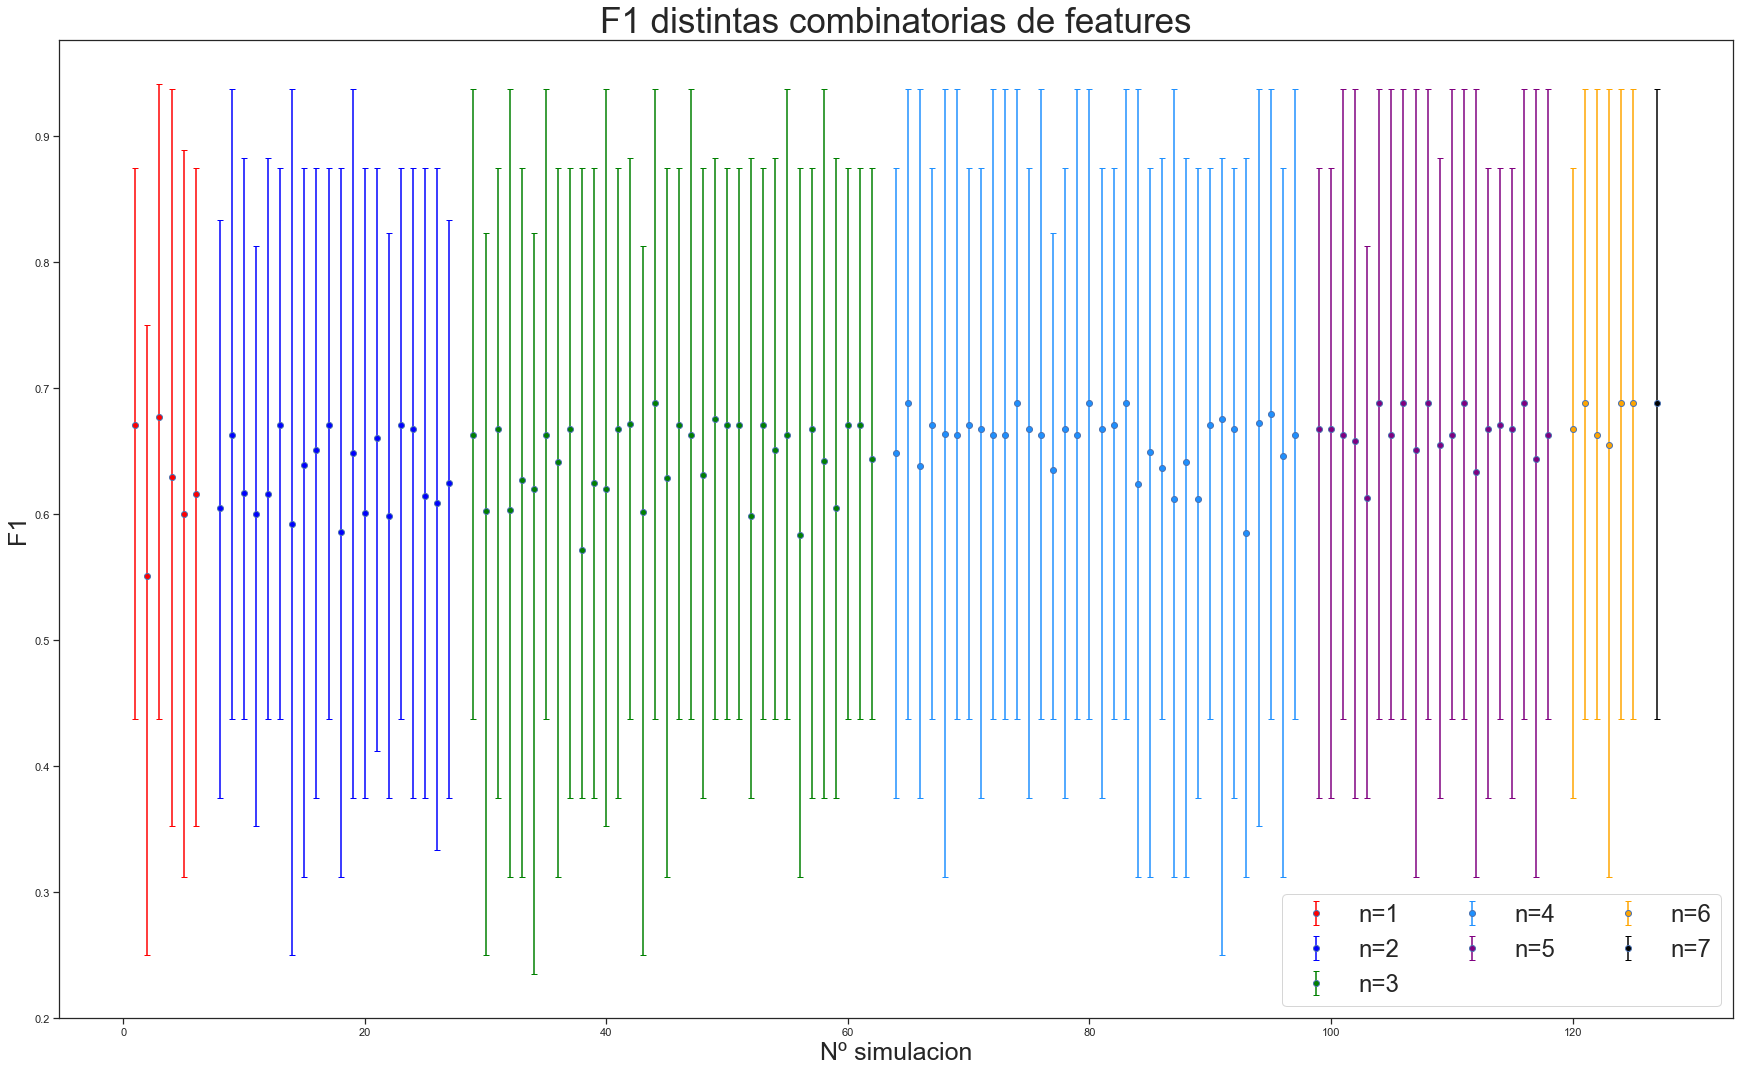

In [43]:
plt.figure(figsize=(30,18))
#plt.errorbar(x=np.arange(1,len(P3)+1),y=S,yerr = np.asarray(yerr).T,fmt='go',capsize=3)
plt.errorbar(x=np.arange(1,7),y=S[0:6],yerr = np.asarray(yerr[0:6]).T,fmt='o',capsize=3,label='n=1',mfc='red',ecolor='red')
plt.errorbar(x=np.arange(8,28),y=S[7:27],yerr = np.asarray(yerr[7:27]).T,fmt='o',capsize=3,label='n=2',mfc='blue',ecolor='blue')
plt.errorbar(x=np.arange(29,63),y=S[28:62],yerr = np.asarray(yerr[28:62]).T,fmt='o',capsize=3,label='n=3',mfc='green',ecolor='green')
plt.errorbar(x=np.arange(64,98),y=S[63:97],yerr = np.asarray(yerr[63:97]).T,fmt='o',capsize=3,label='n=4',mfc='dodgerblue',ecolor='dodgerblue')
plt.errorbar(x=np.arange(99,119),y=S[98:118],yerr = np.asarray(yerr[98:118]).T,fmt='o',capsize=3,label='n=5',mfc='purple',ecolor='purple')
plt.errorbar(x=np.arange(120,126),y=S[119:125],yerr = np.asarray(yerr[119:125]).T,fmt='o',capsize=3,label='n=6',mfc='orange',ecolor='orange')
plt.errorbar(x=127,y=S[126],yerr = np.asarray([yerr[126]]).T,fmt='o',capsize=3,label='n=7',mfc='black',ecolor='black')
#plt.hlines(0.65,0,128,'r')
plt.xlabel('Nº simulacion', fontsize=25)
plt.ylabel('F1',fontsize=25)
plt.title('F1 distintas combinatorias de features',fontsize=35)
plt.legend(fontsize=24,ncol=3,loc='lower right')
#plt.savefig("F1_comb_features.png", bbox_inches='tight', dpi=600)
plt.show()

# Confusion matrix

## Matriz de confusion k-fold:
    - Sumar las matrices de cada Fold: representa el rendimiento en la clasficacion de TODOS los datos
    - Asume que el sampling no se repite

In [44]:
# Modelos a los que se evaluara FN
p1 = np.asarray(P1)
p2 = np.asarray(P2)
p3 = np.asarray(P3)

In [45]:
print('Los siguientes modelos obtuvieron F1 promedio >0.65\n')
mod_chosen1 = []
mod_chosen2 = []
for i in range(len(p3)):
    if p3[i]>=0:#0.65:
        print(*p1[i],sep='\n')
        mod_chosen1.append(features_used[i])
        #mod_chosen1.append(p1[i])
        print('model: ',p2[i],'\nscore: ',p3[i],'\n')
        mod_chosen2.append(p2[i])
print('Son ',len(mod_chosen2),' combinaciones distintas')

Los siguientes modelos obtuvieron F1 promedio >0.65

Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
First Order Numeric::Minimum
model:  KNN 
score:  0.6881535947712417 

Volumetric Features::Surface to volume ratio (mesh based)
Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
First Order Numeric::Minimum
model:  KNN 
score:  0.6881535947712417 

Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Correlation
First Order Numeric::Minimum
model:  KNN 
score:  0.6881535947712417 

Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
Co-occurenced Based Features::Overall Dissimilarity
First Order Numeric::Minimum
model:  KNN 
score:  0.6881535947712417 

Volumetric Features::Surface (mesh based)
First Order Numeric::Mean
Volumetric Features::Compactness 2 (mesh based)
First Order Numeric::Minimum
model:  KNN 
score:  0.6881535947712417 

Volumetric Features::Surface (mesh based)
Fi

#### Confusion matrix sklearn Cij: known class i predicted class j
Thus in binary classification, the count of true negatives is C00, false negatives is C10, true positives is C11 and false positives is C01 

In [46]:
def metricas(cm):
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    return (TP,TN,FP,FN)

In [47]:
def interes(TP,TN,FP,FN):
    FNR = FN/(TP+FN)
    FOR = FN/(TN+FN)
    return(FNR,FOR)

In [48]:
def F1_total(TP,TN,FP,FN):
    VPP = TP/(TP+FP)
    TPR = TP/(TP+FN)
    F1 = 0.5*(pow(VPP,-1) + pow(TPR,-1))
    F1 = pow(F1,-1)
    return(F1)

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm.classes import SVC
from sklearn.metrics import confusion_matrix
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
y = df['Diagnosis'].values

In [50]:
#cv = KFold(len(labels), n_folds=10)
k=5
repeated = 20
cv = StratifiedKFold(n_splits=k, random_state=4)
cvr= RepeatedStratifiedKFold(n_splits=k, n_repeats=repeated, random_state=0)
mod_names = [models[i][0] for i in range(np.shape(models)[0])]
#metricas de cada modelo revisado
Fnr = []
For = []
cm_mods = [] #set de CMs de cada uno de los modelos
for i in range(len(mod_chosen1)):
    print('\nMatriz de Confusion features: ',mod_chosen1[i])
    X = np.asarray(df[mod_chosen1[i]])
    clf = models[mod_names.index(mod_chosen2[i])][1]
    print('Modelo: ',models[mod_names.index(mod_chosen2[i])][0])
    conf_mat = np.zeros((2,2))
    rep_completa = 0 #var aux para guardar CM cuando hace todos los fold de una repeticion
    cm_mod = []#set de CMs del modelo individual
    for train_index, test_index in cvr.split(X,y):
        clf.fit(X[train_index], y[train_index])
        ypred = clf.predict(X[test_index])
        mc = confusion_matrix(y[test_index], ypred)
        conf_mat = conf_mat + mc
        rep_completa = rep_completa+1
        if rep_completa % k == 0:
            cm_rep = conf_mat #CM de todos los datos en esta repeticion
            print(cm_rep)
            tp,tn,fp,fn = metricas(cm_rep)
            cm_mod.append(cm_rep)
            conf_mat = 0
            
    cm_mods.append(cm_mod)


Matriz de Confusion features:  ['Volumetric Features::Surface (mesh based)']
Modelo:  KNN
[[28. 14.]
 [15. 26.]]
[[26 16]
 [13 28]]
[[29 13]
 [13 28]]
[[30 12]
 [15 26]]
[[32 10]
 [13 28]]
[[29 13]
 [16 25]]
[[26 16]
 [15 26]]
[[30 12]
 [13 28]]
[[32 10]
 [15 26]]
[[31 11]
 [16 25]]
[[29 13]
 [13 28]]
[[30 12]
 [15 26]]
[[28 14]
 [15 26]]
[[27 15]
 [14 27]]
[[28 14]
 [14 27]]
[[28 14]
 [13 28]]
[[29 13]
 [14 27]]
[[28 14]
 [16 25]]
[[28 14]
 [14 27]]
[[31 11]
 [14 27]]

Matriz de Confusion features:  ['First Order Numeric::Minimum']
Modelo:  KNN
[[19. 23.]
 [21. 20.]]
[[17 25]
 [19 22]]
[[19 23]
 [17 24]]
[[20 22]
 [11 30]]
[[20 22]
 [17 24]]
[[17 25]
 [13 28]]
[[25 17]
 [20 21]]
[[21 21]
 [13 28]]
[[18 24]
 [19 22]]
[[18 24]
 [12 29]]
[[19 23]
 [13 28]]
[[18 24]
 [14 27]]
[[20 22]
 [17 24]]
[[20 22]
 [16 25]]
[[19 23]
 [22 19]]
[[18 24]
 [20 21]]
[[21 21]
 [17 24]]
[[19 23]
 [19 22]]
[[20 22]
 [10 31]]
[[19 23]
 [18 23]]

Matriz de Confusion features:  ['Volumetric Features::Surface 

[[30 12]
 [22 19]]
[[29 13]
 [21 20]]
[[27 15]
 [27 14]]
[[29 13]
 [19 22]]
[[31 11]
 [27 14]]

Matriz de Confusion features:  ['Volumetric Features::Surface to volume ratio (mesh based)'
 'First Order Numeric::Minimum']
Modelo:  SVM
[[16. 26.]
 [23. 18.]]
[[17 25]
 [21 20]]
[[19 23]
 [21 20]]
[[21 21]
 [20 21]]
[[17 25]
 [19 22]]
[[17 25]
 [17 24]]
[[17 25]
 [20 21]]
[[20 22]
 [15 26]]
[[22 20]
 [21 20]]
[[16 26]
 [18 23]]
[[20 22]
 [21 20]]
[[16 26]
 [17 24]]
[[19 23]
 [18 23]]
[[21 21]
 [18 23]]
[[21 21]
 [19 22]]
[[13 29]
 [17 24]]
[[20 22]
 [21 20]]
[[13 29]
 [22 19]]
[[18 24]
 [20 21]]
[[15 27]
 [14 27]]

Matriz de Confusion features:  ['First Order Numeric::Mean'
 'Volumetric Features::Compactness 2 (mesh based)']
Modelo:  NB
[[26. 16.]
 [15. 26.]]
[[24 18]
 [13 28]]
[[29 13]
 [11 30]]
[[25 17]
 [13 28]]
[[26 16]
 [13 28]]
[[25 17]
 [15 26]]
[[26 16]
 [13 28]]
[[27 15]
 [13 28]]
[[26 16]
 [15 26]]
[[30 12]
 [12 29]]
[[26 16]
 [13 28]]
[[26 16]
 [12 29]]
[[23 19]
 [15 26]]
[[25 1

[[24 18]
 [18 23]]
[[23 19]
 [20 21]]
[[21 21]
 [22 19]]
[[23 19]
 [18 23]]
[[20 22]
 [15 26]]
[[20 22]
 [18 23]]
[[22 20]
 [18 23]]
[[24 18]
 [16 25]]
[[18 24]
 [26 15]]
[[17 25]
 [17 24]]
[[22 20]
 [15 26]]
[[17 25]
 [20 21]]
[[20 22]
 [12 29]]
[[20 22]
 [19 22]]

Matriz de Confusion features:  ['Co-occurenced Based Features::Overall Correlation'
 'Co-occurenced Based Features::Overall Dissimilarity'
 'Volumetric Features::Compactness 2 (mesh based)']
Modelo:  KNN
[[24. 18.]
 [22. 19.]]
[[22 20]
 [19 22]]
[[27 15]
 [17 24]]
[[29 13]
 [19 22]]
[[29 13]
 [17 24]]
[[28 14]
 [19 22]]
[[26 16]
 [21 20]]
[[24 18]
 [16 25]]
[[27 15]
 [19 22]]
[[28 14]
 [17 24]]
[[26 16]
 [21 20]]
[[24 18]
 [19 22]]
[[27 15]
 [16 25]]
[[24 18]
 [18 23]]
[[23 19]
 [18 23]]
[[23 19]
 [17 24]]
[[28 14]
 [22 19]]
[[27 15]
 [17 24]]
[[23 19]
 [16 25]]
[[25 17]
 [17 24]]

Matriz de Confusion features:  ['Volumetric Features::Surface (mesh based)'
 'Volumetric Features::Compactness 2 (mesh based)'
 'First Order Num

[[20 22]
 [16 25]]
[[19 23]
 [18 23]]
[[20 22]
 [20 21]]
[[21 21]
 [20 21]]
[[19 23]
 [23 18]]
[[18 24]
 [23 18]]
[[21 21]
 [18 23]]
[[20 22]
 [23 18]]
[[19 23]
 [13 28]]
[[19 23]
 [19 22]]

Matriz de Confusion features:  ['Volumetric Features::Surface to volume ratio (mesh based)'
 'Co-occurenced Based Features::Overall Correlation'
 'Volumetric Features::Compactness 2 (mesh based)']
Modelo:  KNN
[[35.  7.]
 [17. 24.]]
[[31 11]
 [15 26]]
[[28 14]
 [14 27]]
[[30 12]
 [15 26]]
[[33  9]
 [16 25]]
[[32 10]
 [14 27]]
[[27 15]
 [13 28]]
[[30 12]
 [15 26]]
[[31 11]
 [15 26]]
[[31 11]
 [14 27]]
[[29 13]
 [15 26]]
[[29 13]
 [15 26]]
[[30 12]
 [16 25]]
[[28 14]
 [15 26]]
[[29 13]
 [16 25]]
[[30 12]
 [19 22]]
[[29 13]
 [16 25]]
[[29 13]
 [13 28]]
[[29 13]
 [13 28]]
[[33  9]
 [15 26]]

Matriz de Confusion features:  ['Volumetric Features::Surface to volume ratio (mesh based)'
 'Volumetric Features::Surface (mesh based)'
 'Co-occurenced Based Features::Overall Dissimilarity']
Modelo:  KNN
[[28. 14

[[18 24]
 [20 21]]
[[24 18]
 [20 21]]
[[24 18]
 [17 24]]
[[20 22]
 [21 20]]

Matriz de Confusion features:  ['Volumetric Features::Surface to volume ratio (mesh based)'
 'First Order Numeric::Mean'
 'Co-occurenced Based Features::Overall Correlation'
 'Co-occurenced Based Features::Overall Dissimilarity']
Modelo:  KNN
[[22. 20.]
 [24. 17.]]
[[22 20]
 [21 20]]
[[26 16]
 [22 19]]
[[22 20]
 [25 16]]
[[23 19]
 [24 17]]
[[21 21]
 [21 20]]
[[27 15]
 [17 24]]
[[25 17]
 [21 20]]
[[21 21]
 [21 20]]
[[19 23]
 [22 19]]
[[23 19]
 [23 18]]
[[26 16]
 [21 20]]
[[17 25]
 [21 20]]
[[27 15]
 [18 23]]
[[22 20]
 [20 21]]
[[23 19]
 [24 17]]
[[19 23]
 [20 21]]
[[25 17]
 [20 21]]
[[24 18]
 [17 24]]
[[21 21]
 [21 20]]

Matriz de Confusion features:  ['Volumetric Features::Surface to volume ratio (mesh based)'
 'Volumetric Features::Surface (mesh based)' 'First Order Numeric::Mean'
 'First Order Numeric::Minimum']
Modelo:  KNN
[[31. 11.]
 [16. 25.]]
[[33  9]
 [15 26]]
[[29 13]
 [14 27]]
[[32 10]
 [17 24]]
[[31

[[26 16]
 [14 27]]
[[29 13]
 [13 28]]
[[28 14]
 [14 27]]
[[23 19]
 [22 19]]
[[28 14]
 [13 28]]
[[27 15]
 [15 26]]
[[28 14]
 [16 25]]
[[28 14]
 [16 25]]
[[24 18]
 [15 26]]
[[27 15]
 [14 27]]
[[28 14]
 [16 25]]
[[27 15]
 [18 23]]
[[27 15]
 [16 25]]
[[28 14]
 [13 28]]
[[27 15]
 [17 24]]
[[28 14]
 [14 27]]
[[25 17]
 [15 26]]

Matriz de Confusion features:  ['Volumetric Features::Surface to volume ratio (mesh based)'
 'Volumetric Features::Surface (mesh based)'
 'Co-occurenced Based Features::Overall Correlation'
 'First Order Numeric::Minimum']
Modelo:  NB
[[28. 14.]
 [23. 18.]]
[[31 11]
 [23 18]]
[[29 13]
 [16 25]]
[[29 13]
 [22 19]]
[[29 13]
 [18 23]]
[[28 14]
 [20 21]]
[[29 13]
 [20 21]]
[[29 13]
 [19 22]]
[[29 13]
 [22 19]]
[[31 11]
 [22 19]]
[[28 14]
 [21 20]]
[[30 12]
 [23 18]]
[[28 14]
 [22 19]]
[[29 13]
 [18 23]]
[[30 12]
 [25 16]]
[[29 13]
 [20 21]]
[[31 11]
 [18 23]]
[[29 13]
 [23 18]]
[[31 11]
 [19 22]]
[[30 12]
 [21 20]]

Matriz de Confusion features:  ['Volumetric Features::Su

[[26 16]
 [14 27]]
[[27 15]
 [16 25]]

Matriz de Confusion features:  ['Volumetric Features::Surface to volume ratio (mesh based)'
 'First Order Numeric::Mean'
 'Co-occurenced Based Features::Overall Dissimilarity'
 'First Order Numeric::Minimum']
Modelo:  NB
[[24. 18.]
 [22. 19.]]
[[29 13]
 [20 21]]
[[25 17]
 [18 23]]
[[24 18]
 [22 19]]
[[27 15]
 [18 23]]
[[30 12]
 [16 25]]
[[25 17]
 [20 21]]
[[27 15]
 [19 22]]
[[28 14]
 [19 22]]
[[27 15]
 [20 21]]
[[25 17]
 [20 21]]
[[26 16]
 [17 24]]
[[23 19]
 [20 21]]
[[28 14]
 [19 22]]
[[23 19]
 [21 20]]
[[26 16]
 [18 23]]
[[30 12]
 [16 25]]
[[29 13]
 [18 23]]
[[27 15]
 [15 26]]
[[27 15]
 [21 20]]

Matriz de Confusion features:  ['First Order Numeric::Mean'
 'Co-occurenced Based Features::Overall Correlation'
 'Co-occurenced Based Features::Overall Dissimilarity'
 'Volumetric Features::Compactness 2 (mesh based)']
Modelo:  NB
[[31. 11.]
 [16. 25.]]
[[27 15]
 [14 27]]
[[27 15]
 [12 29]]
[[26 16]
 [10 31]]
[[28 14]
 [10 31]]
[[27 15]
 [12 29]]
[[25 

[[33  9]
 [33  8]]
[[33  9]
 [33  8]]
[[33  9]
 [33  8]]
[[33  9]
 [33  8]]
[[33  9]
 [33  8]]
[[35  7]
 [33  8]]
[[42  0]
 [41  0]]
[[33  9]
 [33  8]]
[[35  7]
 [33  8]]
[[42  0]
 [41  0]]
[[35  7]
 [34  7]]
[[33  9]
 [33  8]]
[[42  0]
 [41  0]]
[[33  9]
 [33  8]]

Matriz de Confusion features:  ['First Order Numeric::Mean'
 'Co-occurenced Based Features::Overall Correlation'
 'Co-occurenced Based Features::Overall Dissimilarity'
 'Volumetric Features::Compactness 2 (mesh based)'
 'First Order Numeric::Minimum']
Modelo:  NB
[[30. 12.]
 [16. 25.]]
[[27 15]
 [16 25]]
[[27 15]
 [14 27]]
[[27 15]
 [13 28]]
[[29 13]
 [14 27]]
[[26 16]
 [15 26]]
[[26 16]
 [16 25]]
[[28 14]
 [11 30]]
[[28 14]
 [15 26]]
[[30 12]
 [14 27]]
[[28 14]
 [13 28]]
[[24 18]
 [15 26]]
[[28 14]
 [15 26]]
[[26 16]
 [16 25]]
[[29 13]
 [17 24]]
[[28 14]
 [15 26]]
[[29 13]
 [14 27]]
[[27 15]
 [13 28]]
[[27 15]
 [14 27]]
[[27 15]
 [15 26]]

Matriz de Confusion features:  ['Volumetric Features::Surface (mesh based)' 'First O

[[28 14]
 [16 25]]
[[30 12]
 [18 23]]
[[29 13]
 [21 20]]
[[31 11]
 [15 26]]
[[31 11]
 [19 22]]
[[29 13]
 [20 21]]
[[28 14]
 [19 22]]
[[29 13]
 [19 22]]
[[25 17]
 [16 25]]
[[26 16]
 [15 26]]
[[30 12]
 [20 21]]
[[29 13]
 [22 19]]
[[30 12]
 [17 24]]
[[30 12]
 [18 23]]
[[28 14]
 [16 25]]
[[30 12]
 [21 20]]

Matriz de Confusion features:  ['Volumetric Features::Surface to volume ratio (mesh based)'
 'Volumetric Features::Surface (mesh based)' 'First Order Numeric::Mean'
 'Co-occurenced Based Features::Overall Correlation'
 'Co-occurenced Based Features::Overall Dissimilarity'
 'Volumetric Features::Compactness 2 (mesh based)']
Modelo:  LR
[[26. 16.]
 [14. 27.]]
[[25 17]
 [17 24]]
[[24 18]
 [13 28]]
[[26 16]
 [13 28]]
[[25 17]
 [17 24]]
[[25 17]
 [15 26]]
[[24 18]
 [20 21]]
[[27 15]
 [14 27]]
[[25 17]
 [13 28]]
[[26 16]
 [16 25]]
[[25 17]
 [15 26]]
[[25 17]
 [15 26]]
[[25 17]
 [14 27]]
[[24 18]
 [15 26]]
[[25 17]
 [17 24]]
[[25 17]
 [17 24]]
[[28 14]
 [14 27]]
[[26 16]
 [15 26]]
[[26 16]
 [1

In [51]:
Fnr_mean = []#valor promedio de Fnr de cada uno de los modelos
Fnr_mods = np.zeros((repeated,len(mod_chosen1)))
F1_mean = []
F1_mods = np.zeros((repeated,len(mod_chosen1)))
for i in range(np.shape(cm_mods)[0]):
    Fnr_mod = []
    F1_mod = []
    for j in range(0,repeated):
        mat_conf = cm_mods[i][j]
        tp,tn,fp,fn = metricas(mat_conf)
        Fnr,For = interes(tp,tn,fp,fn)
        Fnr_mod.append(Fnr)
        F1 = F1_total(tp,tn,fp,fn)
        F1_mod.append(F1)
    Fnr_mods[:,i] = Fnr_mod
    F1_mods[:,i] = F1_mod
    Fnr_promedio = np.mean(Fnr_mod)
    Fnr_mean.append(Fnr_promedio)
    F1_mean.append(np.mean(F1_mod))

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


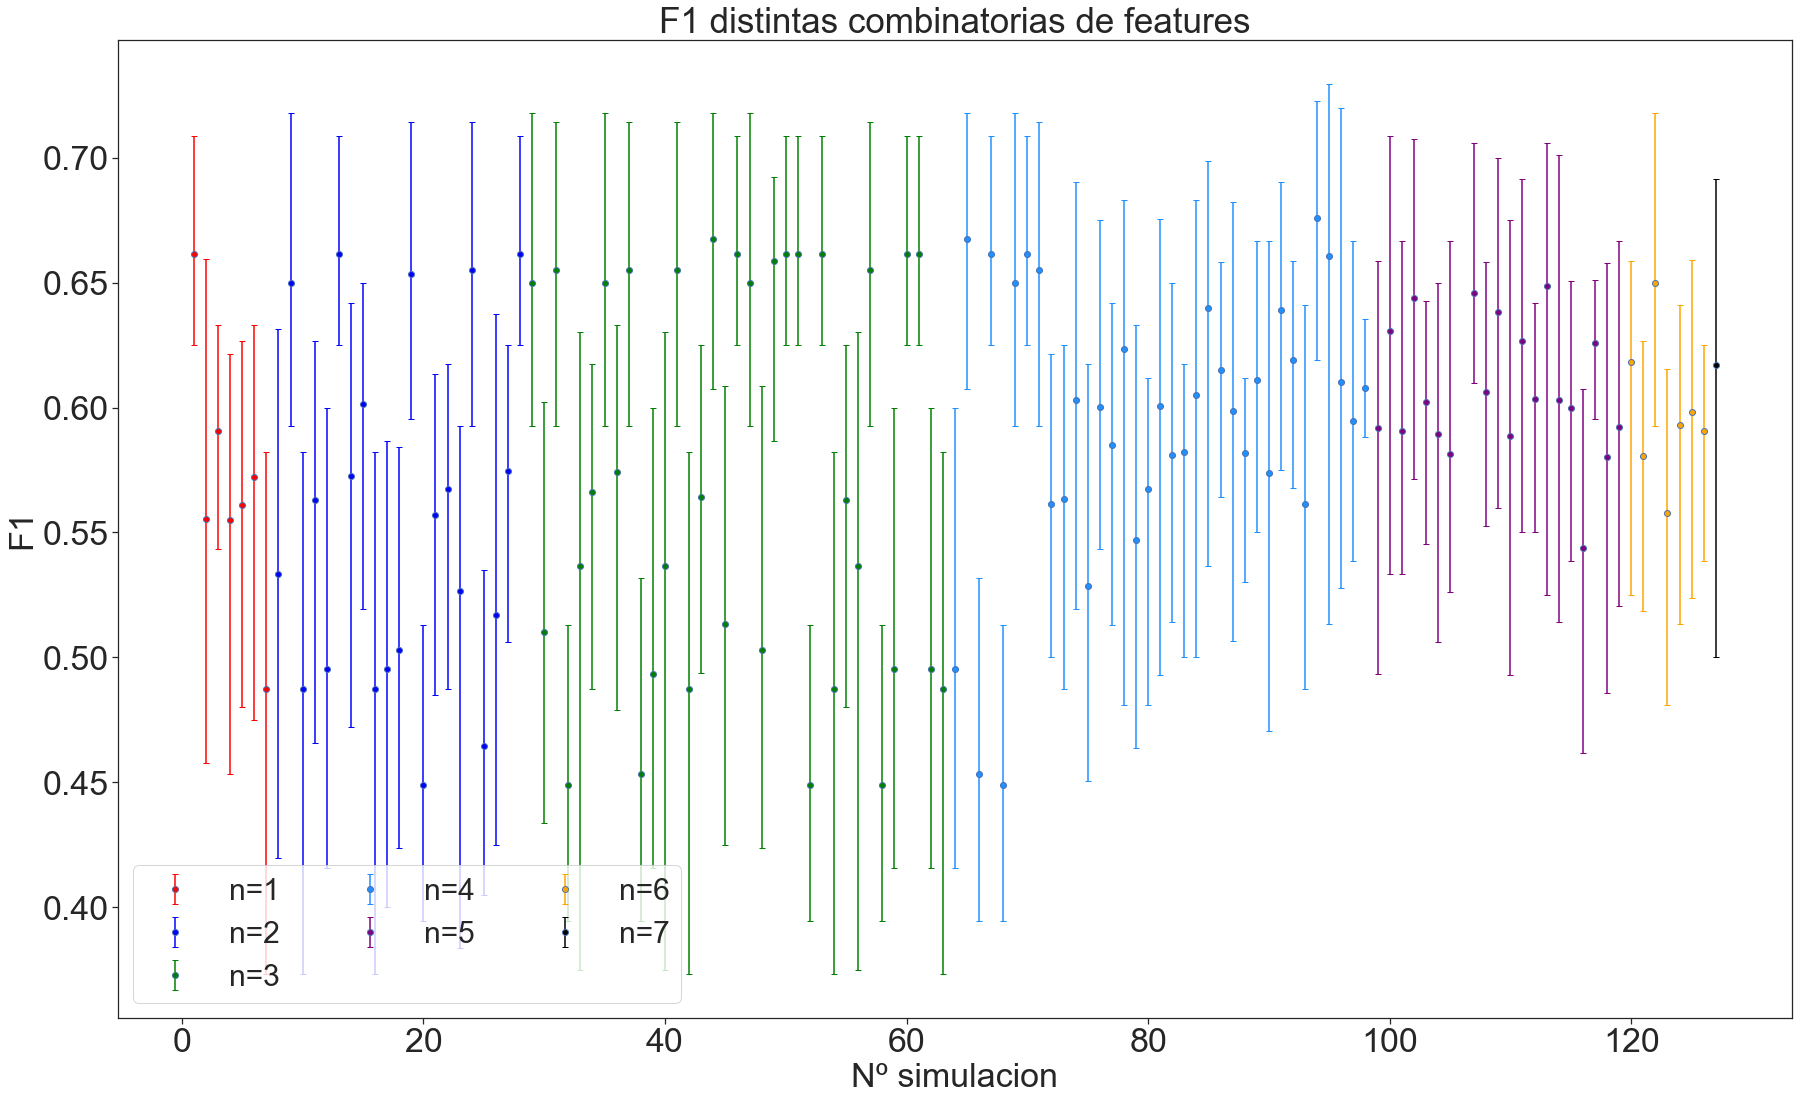

In [52]:
yerr = []
for i in range(len(mod_chosen1)):
    yerr.append([F1_mean[i]-min(F1_mods[:,i]),max(F1_mods[:,i])-F1_mean[i]])

plt.figure(figsize=(30,18))
#plt.errorbar(x=np.arange(1,len(P3)+1),y=S,yerr = np.asarray(yerr).T,fmt='go',capsize=3)
plt.errorbar(x=np.arange(1,8),y=F1_mean[0:7],yerr = np.asarray(yerr[0:7]).T,fmt='o',capsize=3,label='n=1',mfc='red',ecolor='red')
plt.errorbar(x=np.arange(8,29),y=F1_mean[7:28],yerr = np.asarray(yerr[7:28]).T,fmt='o',capsize=3,label='n=2',mfc='blue',ecolor='blue')
plt.errorbar(x=np.arange(29,64),y=F1_mean[28:63],yerr = np.asarray(yerr[28:63]).T,fmt='o',capsize=3,label='n=3',mfc='green',ecolor='green')
plt.errorbar(x=np.arange(64,99),y=F1_mean[63:98],yerr = np.asarray(yerr[63:98]).T,fmt='o',capsize=3,label='n=4',mfc='dodgerblue',ecolor='dodgerblue')
plt.errorbar(x=np.arange(99,120),y=F1_mean[98:119],yerr = np.asarray(yerr[98:119]).T,fmt='o',capsize=3,label='n=5',mfc='purple',ecolor='purple')
plt.errorbar(x=np.arange(120,127),y=F1_mean[119:126],yerr = np.asarray(yerr[119:126]).T,fmt='o',capsize=3,label='n=6',mfc='orange',ecolor='orange')
plt.errorbar(x=127,y=F1_mean[126],yerr = np.asarray([yerr[126]]).T,fmt='o',capsize=3,label='n=7',mfc='black',ecolor='black')
#plt.hlines(0.65,0,128,'r')
plt.xlabel('Nº simulacion', fontsize=34)
plt.ylabel('F1',fontsize=34)
plt.title('F1 distintas combinatorias de features',fontsize=35)
plt.yticks(fontsize=34)
plt.xticks(fontsize=34)
plt.legend(fontsize=30,ncol=3,loc='lower left')
#plt.savefig("F1_gral_comb_features.png", bbox_inches='tight', dpi=600)
plt.show()

In [54]:
#there are many similar models
count = 0
for i in range(len(F1_mean)):
    if F1_mean[i]>=0.65:
        count +=1
print(count)

23


# Reduce false negative rate

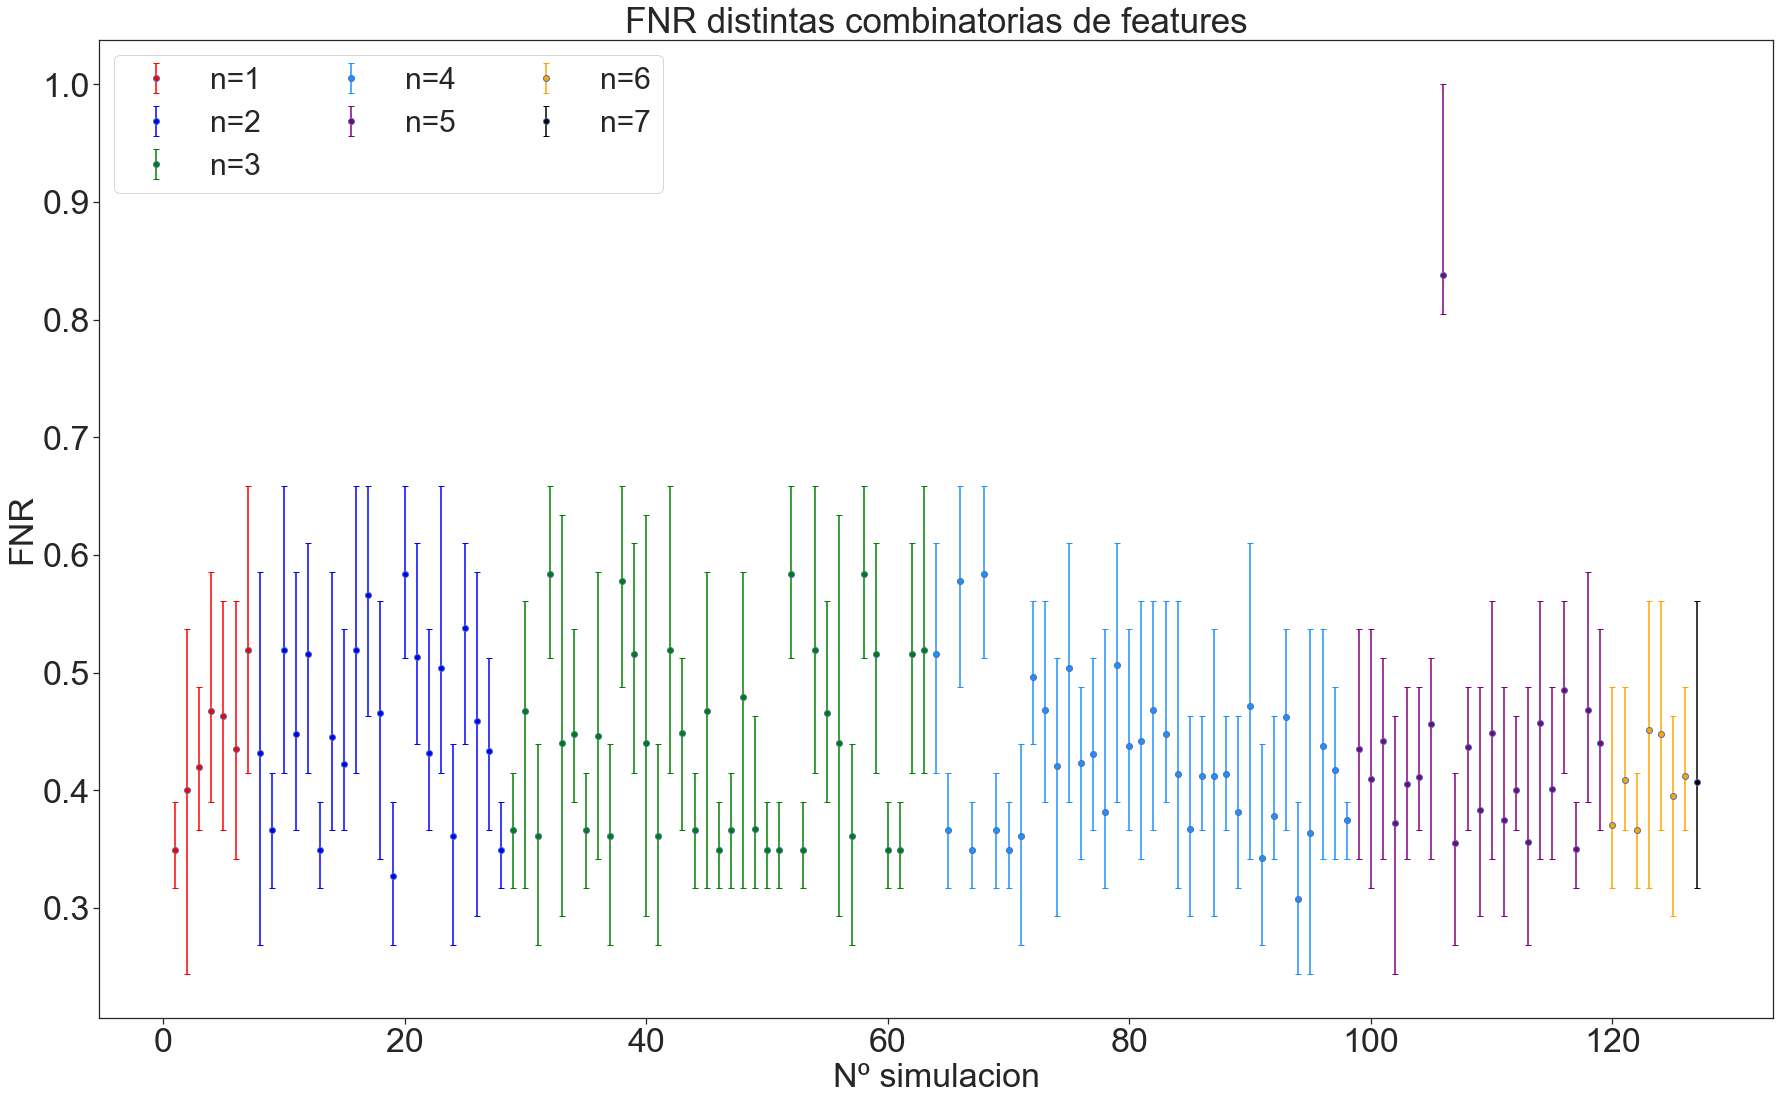

In [56]:
yerr = []
for i in range(len(mod_chosen1)):
    yerr.append([Fnr_mean[i]-min(Fnr_mods[:,i]),max(Fnr_mods[:,i])-Fnr_mean[i]])

plt.figure(figsize=(30,18))
#plt.errorbar(x=np.arange(1,len(P3)+1),y=S,yerr = np.asarray(yerr).T,fmt='go',capsize=3)
plt.errorbar(x=np.arange(1,8),y=Fnr_mean[0:7],yerr = np.asarray(yerr[0:7]).T,fmt='o',capsize=3,label='n=1',mfc='red',ecolor='red')
plt.errorbar(x=np.arange(8,29),y=Fnr_mean[7:28],yerr = np.asarray(yerr[7:28]).T,fmt='o',capsize=3,label='n=2',mfc='blue',ecolor='blue')
plt.errorbar(x=np.arange(29,64),y=Fnr_mean[28:63],yerr = np.asarray(yerr[28:63]).T,fmt='o',capsize=3,label='n=3',mfc='green',ecolor='green')
plt.errorbar(x=np.arange(64,99),y=Fnr_mean[63:98],yerr = np.asarray(yerr[63:98]).T,fmt='o',capsize=3,label='n=4',mfc='dodgerblue',ecolor='dodgerblue')
plt.errorbar(x=np.arange(99,120),y=Fnr_mean[98:119],yerr = np.asarray(yerr[98:119]).T,fmt='o',capsize=3,label='n=5',mfc='purple',ecolor='purple')
plt.errorbar(x=np.arange(120,127),y=Fnr_mean[119:126],yerr = np.asarray(yerr[119:126]).T,fmt='o',capsize=3,label='n=6',mfc='orange',ecolor='orange')
plt.errorbar(x=127,y=Fnr_mean[126],yerr = np.asarray([yerr[126]]).T,fmt='o',capsize=3,label='n=7',mfc='black',ecolor='black')
#plt.hlines(0.65,0,128,'r')
plt.xlabel('Nº simulacion', fontsize=34)
plt.ylabel('FNR',fontsize=34)
plt.title('FNR distintas combinatorias de features',fontsize=35)
plt.legend(fontsize=30,ncol=3,loc='upper left')
plt.yticks(fontsize=34)
plt.xticks(fontsize=34)
#plt.savefig("FNR_comb_features.png", bbox_inches='tight', dpi=600)
plt.show()

In [57]:
print('Modelo que minimiza FNR\nFeatures:\n')
print(*mod_chosen1[Fnr_mean.index(min(Fnr_mean))],sep='\n')
print('\nModelo: ',R[Fnr_mean.index(min(Fnr_mean))])
print('FNR: ',min(Fnr_mean),'+/- ',np.std(Fnr_mods[:,Fnr_mean.index(min(Fnr_mean))]))
print('Valores de FNR:\n', Fnr_mods[:,Fnr_mean.index(min(Fnr_mean))] )
print('Matrices de Confusion\n')
print(*cm_mods[Fnr_mean.index(min(Fnr_mean))],sep='\n')

Modelo que minimiza FNR
Features:

First Order Numeric::Mean
Co-occurenced Based Features::Overall Correlation
Co-occurenced Based Features::Overall Dissimilarity
Volumetric Features::Compactness 2 (mesh based)

Modelo:  NB
FNR:  0.3073170731707318 +/-  0.03567985082518975
Valores de FNR:
 [0.3902439  0.34146341 0.29268293 0.24390244 0.24390244 0.29268293
 0.36585366 0.26829268 0.31707317 0.29268293 0.29268293 0.31707317
 0.34146341 0.29268293 0.34146341 0.29268293 0.29268293 0.31707317
 0.31707317 0.29268293]
Matrices de Confusion

[[31. 11.]
 [16. 25.]]
[[27 15]
 [14 27]]
[[27 15]
 [12 29]]
[[26 16]
 [10 31]]
[[28 14]
 [10 31]]
[[27 15]
 [12 29]]
[[25 17]
 [15 26]]
[[30 12]
 [11 30]]
[[30 12]
 [13 28]]
[[30 12]
 [12 29]]
[[28 14]
 [12 29]]
[[23 19]
 [13 28]]
[[25 17]
 [14 27]]
[[27 15]
 [12 29]]
[[29 13]
 [14 27]]
[[24 18]
 [12 29]]
[[29 13]
 [12 29]]
[[28 14]
 [13 28]]
[[27 15]
 [13 28]]
[[26 16]
 [12 29]]


In [68]:
CM = cm_mods[Fnr_mean.index(min(Fnr_mean))][0]

In [65]:
mod_chosen1[Fnr_mean.index(np.sort(Fnr_mean)[0])]

array(['First Order Numeric::Mean',
       'Co-occurenced Based Features::Overall Correlation',
       'Co-occurenced Based Features::Overall Dissimilarity',
       'Volumetric Features::Compactness 2 (mesh based)'], dtype='<U57')

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,save=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'# if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    bottom, top = plt.ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.ylim(bottom + 0.5, top - 0.5)
    plt.tight_layout()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    if save:
        plt.savefig("CM_menorFNR.png", bbox_inches='tight', dpi=600)
    plt.show()

Confusion matrix, without normalization


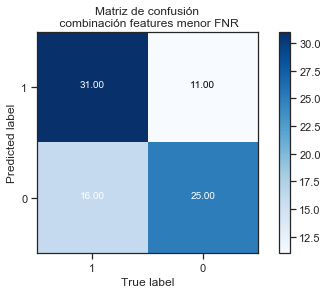

In [71]:
plot_confusion_matrix(CM, classes=['1','0'],normalize=False,title='Matriz de confusión\n combinación features menor FNR',cmap=plt.cm.Blues,save=False)

In [72]:
final_model = p2[Fnr_mean.index(min(Fnr_mean))]
final_features = features_used[Fnr_mean.index(min(Fnr_mean))]

# 3: Frequentist correlated t-test
- The best algorith vs random classification
- 5 fold 20-repeated cross val
- ROC-AUC metric

In [73]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
y = df['Diagnosis'].values

In [74]:
k = 5
repeated = 20 # en caso de RepeatedStratifiedKFold
print('Evaluando mejor modelo features: \n')
print(*final_features,sep='\n')
print('\n')
results = []
names = []
X = np.asarray(df[final_features])
for name, model in models:
    if name in final_model:
        print('Evaluando AUC modelo ',name)
        kRfold= RepeatedStratifiedKFold(n_splits=k, n_repeats=repeated, random_state=0)
        cv_results = cross_val_score(model, X, y, cv=kRfold, scoring='roc_auc')
        clf.fit(X[train_index], y[train_index])
        results.append(cv_results)
        names.append(name)
        print('AUC %s: %f (%f) - median %f' % (name, cv_results.mean(), cv_results.std(), np.median(cv_results)))

Evaluando mejor modelo features: 

First Order Numeric::Mean
Co-occurenced Based Features::Overall Correlation
Co-occurenced Based Features::Overall Dissimilarity
Volumetric Features::Compactness 2 (mesh based)


Evaluando AUC modelo  NB
AUC NB: 0.693785 (0.125029) - median 0.694444


In [75]:
x = np.asarray(results)-0.5#vector diferencia de las metricas

In [76]:
#mu #promedio poblacion
sample_mean = np.mean(x) #media muestral
sample_sd = np.std(x)#std desv muestra
n = k*repeated #total length vector de metrica:K*repeticiones
nte = 1/k#size test set
ntr = 4/k#size training set


In [77]:
t_statistic = sample_mean/np.sqrt((sample_sd**2) *(1/n + nte/ntr) )

In [78]:
from scipy.stats import t as student_t
T = student_t.cdf(np.abs(t_statistic),n-1)
p_val = 2*(1-T)
print('Frequentist correlated t-test\n t_stat : ',t_statistic,'\n p-val: ',p_val)
if p_val < 0.1:
    print('Rechazado H0')
else:
    print('No se rechaza H0')

Frequentist correlated t-test
 t_stat :  3.0396356656920287 
 p-val:  0.0030302709762652924
Rechazado H0


## curva ROC: mejor modelo vs random
cambiar dependiendo el mejor modelo

In [79]:
clf = models[3][1]
print(clf)

GaussianNB(priors=None, var_smoothing=1e-09)


In [80]:
probab = []
Y = []
for train,test in kRfold.split(X,y):#kfold cv con repeticiones
    clf.fit(X[train], y[train])
    probs = clf.predict_proba(X[test])
    probs = probs[:, 1]
    probab.append(probs)
    Y.append(y[test])
probab = np.asarray(probab)
p = []
y_test = []
for i in range(len(probab)):
    for j in range(len(probab[i])):
        p.append(probab[i][j])
        y_test.append(Y[i][j])
p = np.asarray(p)#array con las probab de clasificar en clase 1, tiene (nºdatos*repeticiones) entradas
y_test = np.asarray(y_test)
#probabilidades y clases separadas para cada repeticion de todos los datos
Pr = np.reshape(p,(20,83))
Yr = np.reshape(y_test,(20,83))

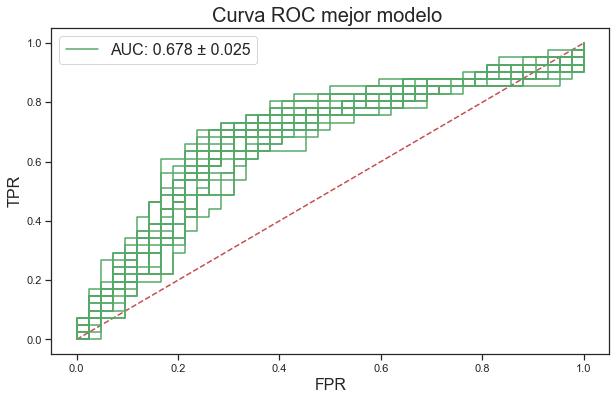

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
#j=16 se ve bien como central
Fpr = []
Tpr = []
RocAuc = []
plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

for i in range(np.shape(Pr)[0]):
    fpr, tpr, thresholds = roc_curve(Yr[i],Pr[i])
    Fpr.append(fpr)
    Tpr.append(tpr)
    roc_auc = roc_auc_score(Yr[i], Pr[i])
    RocAuc.append(roc_auc)
    plt.plot(Fpr[i],Tpr[i],c='g')

label = 'AUC:' + ' {0:.3f}'.format(np.mean(RocAuc)) + ' \u00B1' + ' {0:.3f}'.format(np.std(RocAuc))
plt.plot(Fpr[8],Tpr[8],c='g',label = label)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
title = 'Curva ROC mejor modelo '
plt.title(title, fontsize = 20)
plt.legend(fontsize=16);
#plt.savefig("ROC_curve_best_model.png", bbox_inches='tight', dpi=600)
plt.show()


### Q: hay 20 curvas ROC con su AUC, c/u obtenida con 5-cv sobre todos los datos.
### Pero la evaluación del modelo con cross_val_score('roc_auc') da 100 resultados dando a entender que cada resultado es sobre 1/5 del total

In [73]:
print('Comparacion de AUC\n')
print(np.mean(results),'(',np.std(results),') n = ',np.size(results))
print(np.mean(RocAuc),'(',np.std(RocAuc),') n = ',np.size(RocAuc))

Comparacion de AUC

0.6937847222222221 ( 0.1250291645146768 ) n =  100
0.6775842044134728 ( 0.0246328019692512 ) n =  20


# Extras
## Different plot needed

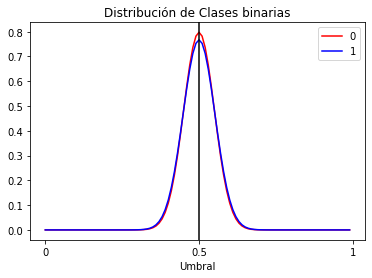

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
x0 = np.arange(-5,0,0.1)
x1 = np.arange(0,5,0.1)
x = np.arange(-5,5,0.1)
g0 = norm.pdf(x,loc=0,scale=0.5)
g1 = norm.pdf(x,loc=0,scale=0.52)
plt.figure()
plt.plot(x,g0,color='r',label='0')
plt.plot(x,g1,color='b',label='1')
plt.axvline(x=0,color='k')
plt.xlabel('Umbral')
plt.xticks(ticks=[-5,0,5],labels=[0,0.5,1])
plt.legend()
plt.savefig("ROC_curve_best_model.png", bbox_inches='tight', dpi=600)
plt.title('Distribución de Clases binarias')
plt.savefig("Dist_ROC.png", bbox_inches='tight', dpi=600)
plt.show()

[-4.   -1.96  0.    1.96  4.  ]


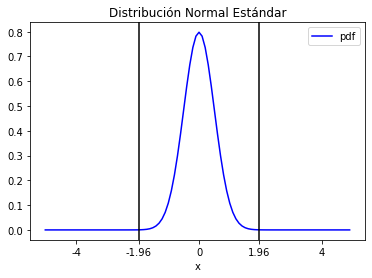

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
x = np.arange(-5,5,0.1)
g = norm.pdf(x,loc=0,scale=0.5)
plt.figure()
plt.plot(x,g,color='b',label='pdf')
# Za/2 0.05 = 1.96
plt.axvline(x=1.96,color='k')
plt.axvline(x=-1.96,color='k')
plt.xlabel('x')
#plt.xticks(ticks=[-5,0,5],labels=[0,0.5,1])
plt.xticks(ticks=[-4,-1.96,0,1.96,4],labels=[-4,-1.96,0,1.96,4])
t,l = plt.xticks()
print(t)
plt.legend()
plt.title('Distribución Normal Estándar')
#plt.savefig("pdf_NormSD.png", bbox_inches='tight', dpi=600)
plt.show()

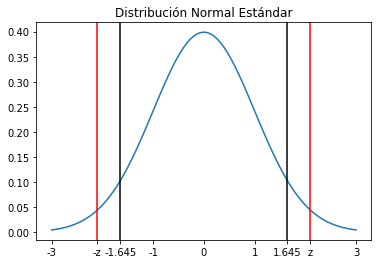

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(x=1.645,color='k')
plt.axvline(x=-1.645,color='k')
plt.axvline(x=2.1,color='r')
plt.axvline(x=-2.1,color='r')
plt.xticks(ticks=[-3,-2.1,-1.645,-1,0,1,1.645,2.1,3],labels=[-3,'-z',-1.645,-1,0,1,1.645,'z',3])
plt.title('Distribución Normal Estándar')
plt.savefig("pdf_NormSD.png", bbox_inches='tight', dpi=600)
plt.show()

Cut off:  0.5098494931234008


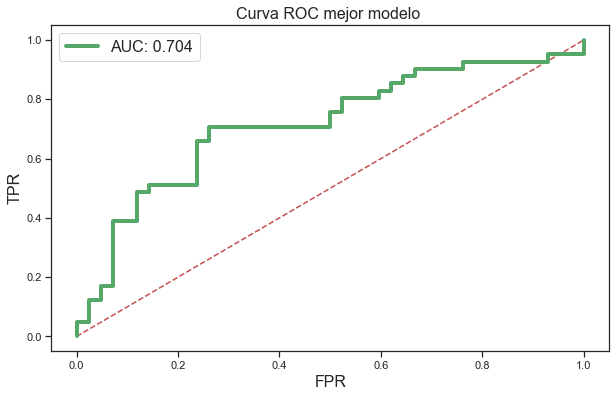

In [158]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')
fpr, tpr, thresholds = roc_curve(Yr[0],Pr[0])
roc_auc = roc_auc_score(Yr[1], Pr[1])
optimal_threshold = thresholds[np.argmax(tpr-fpr)]
print('Cut off: ',optimal_threshold)
label = 'AUC:' + ' {0:.3f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
title = 'Curva ROC mejor modelo '
plt.title(title, fontsize = 16)
plt.legend(fontsize=16);
#plt.savefig("ROC_curve_best_model.png", bbox_inches='tight', dpi=600)
plt.show()

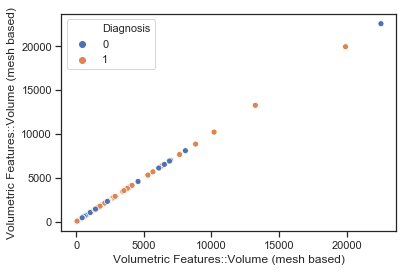

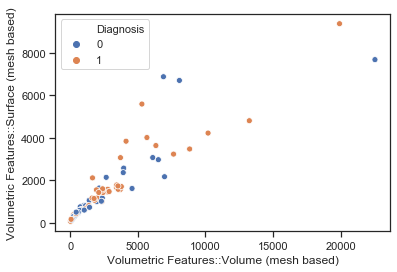

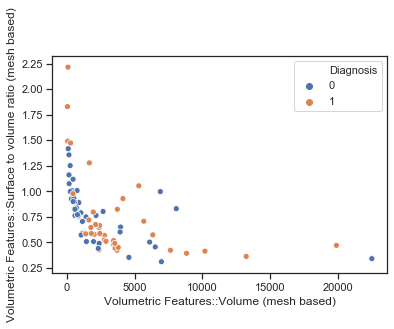

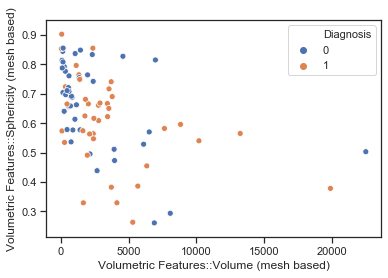

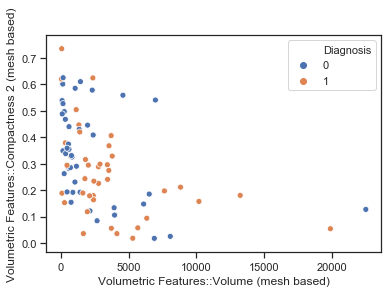

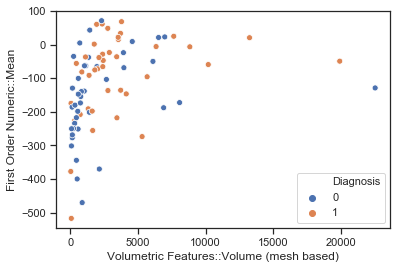

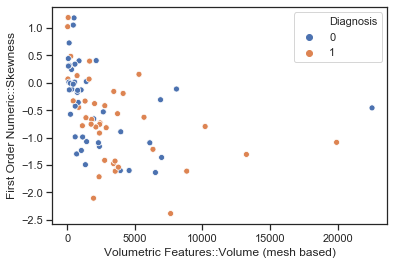

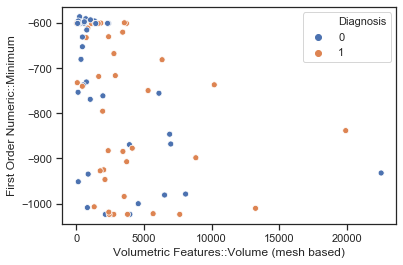

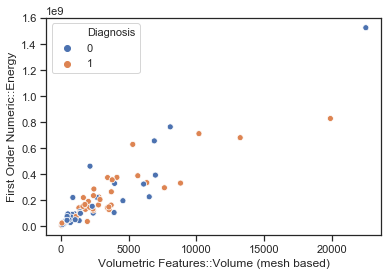

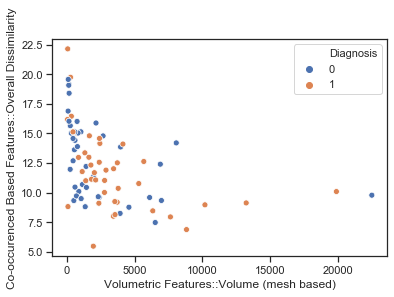

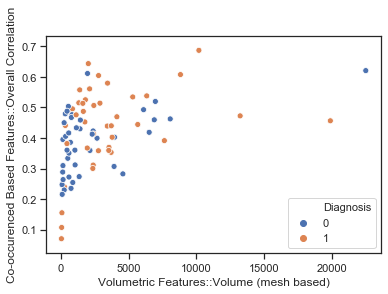

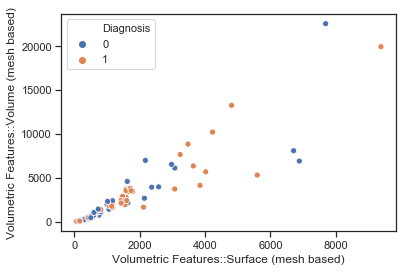

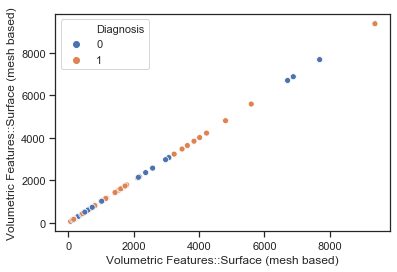

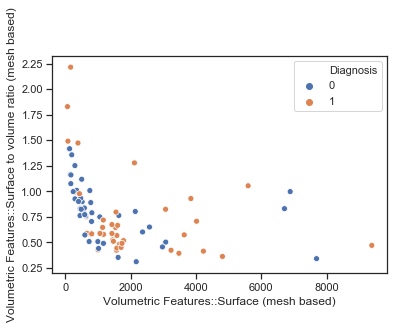

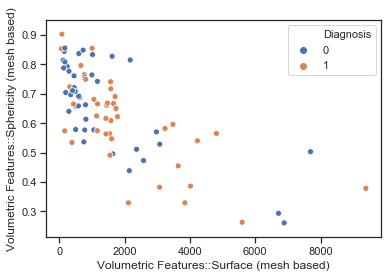

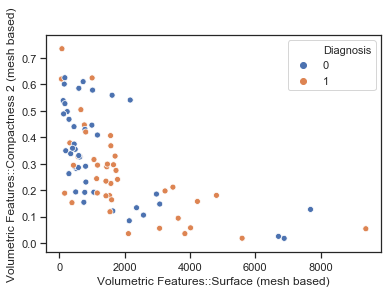

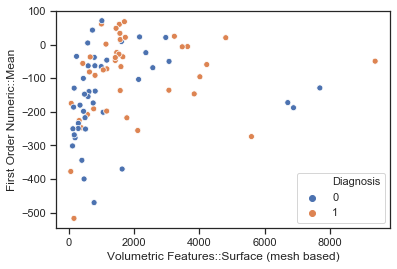

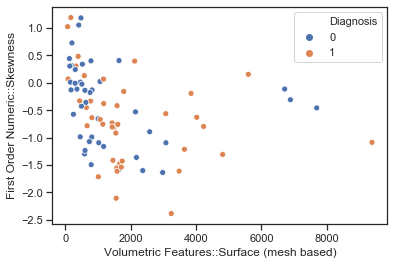

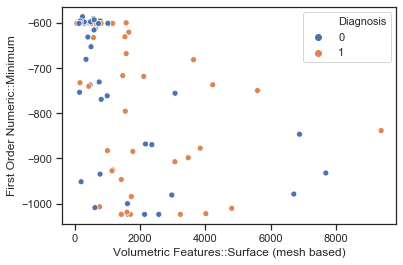

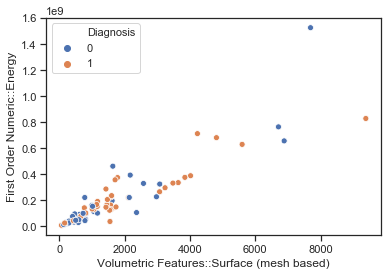

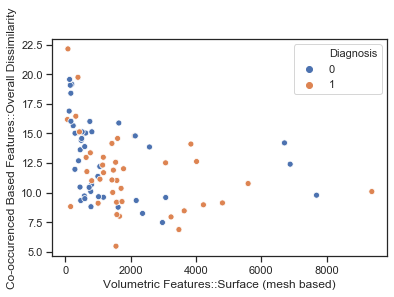

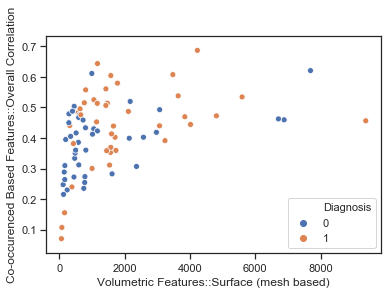

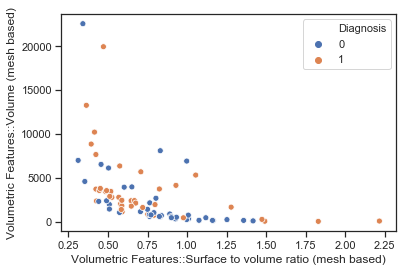

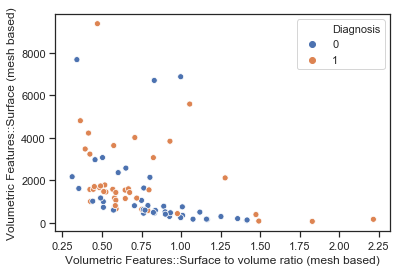

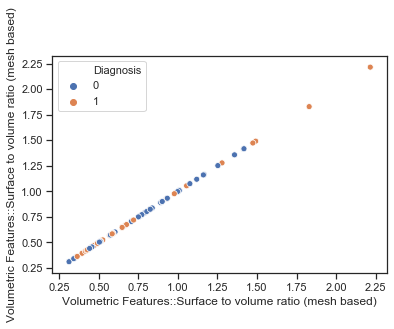

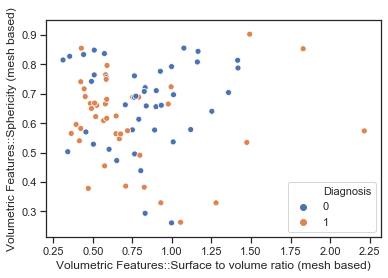

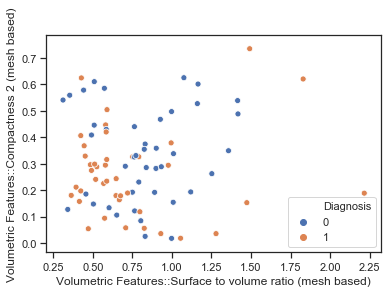

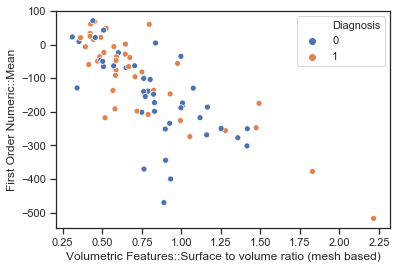

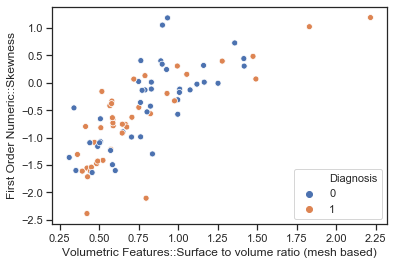

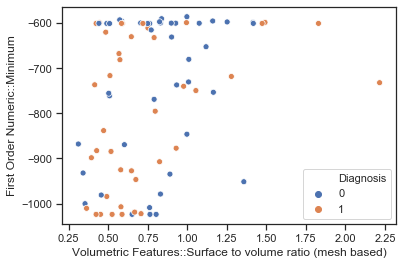

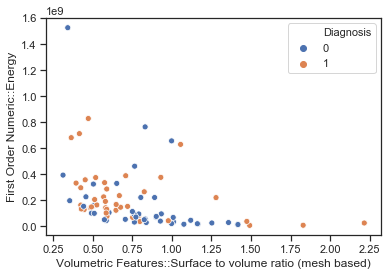

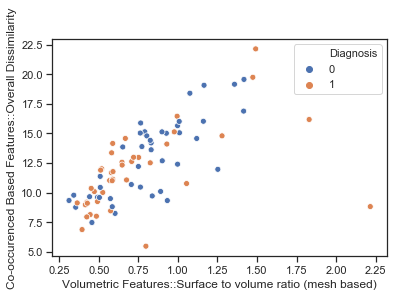

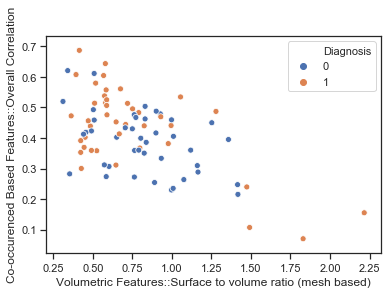

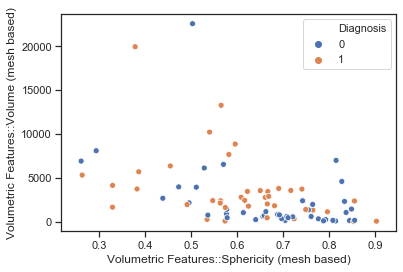

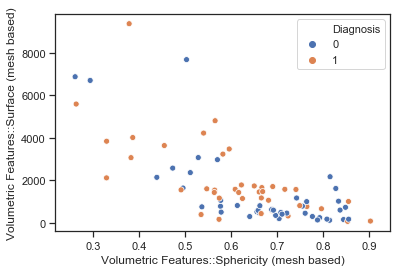

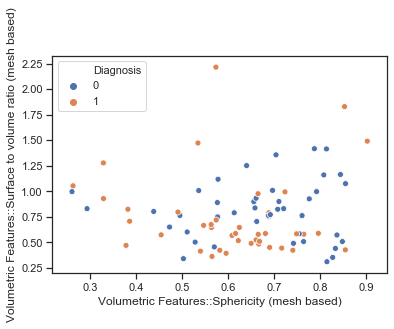

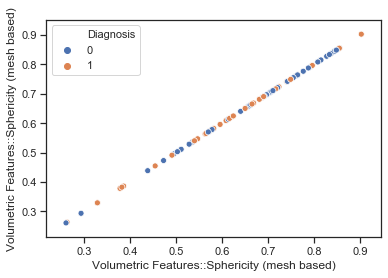

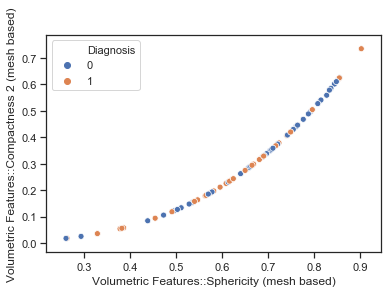

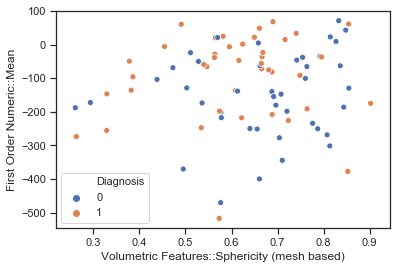

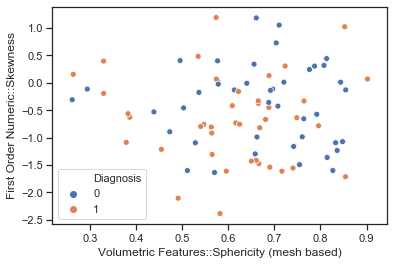

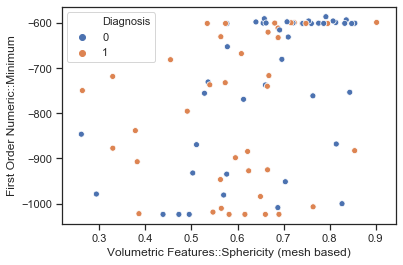

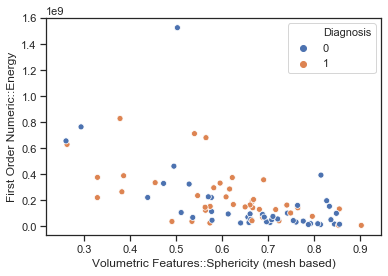

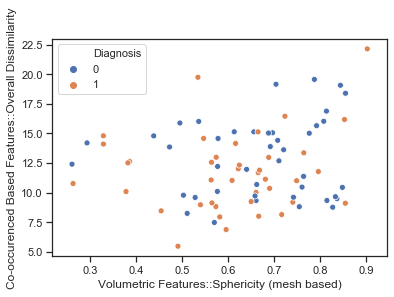

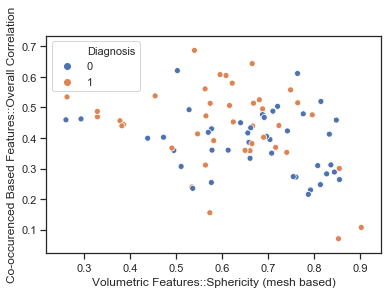

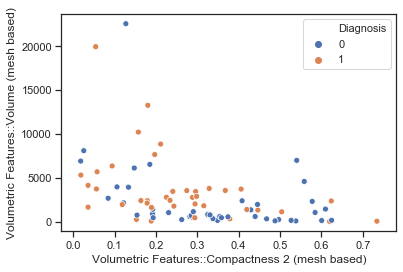

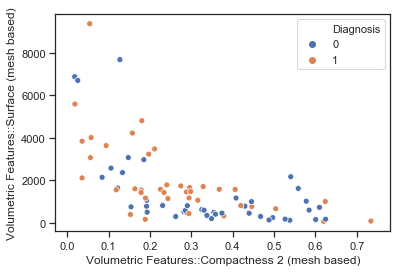

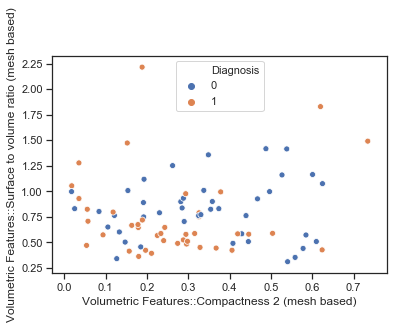

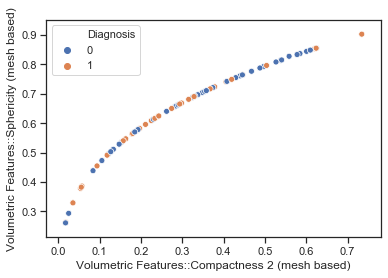

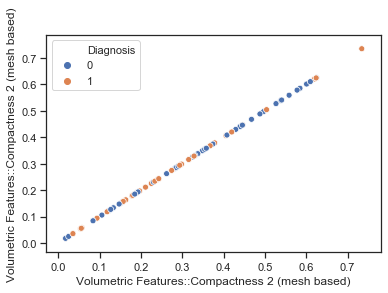

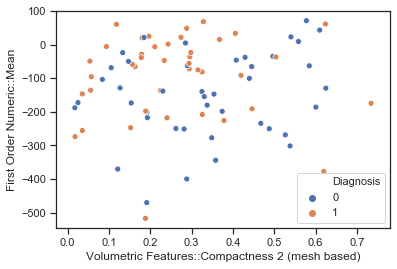

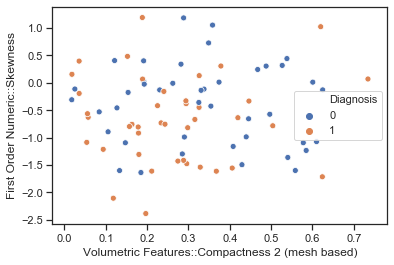

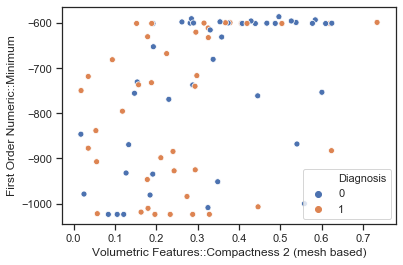

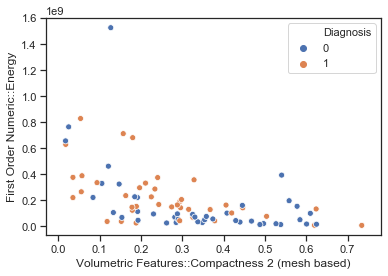

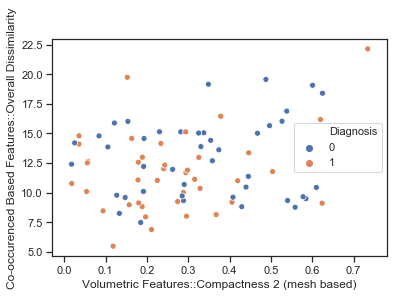

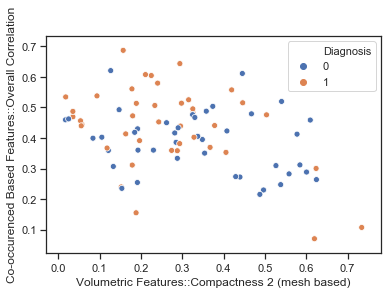

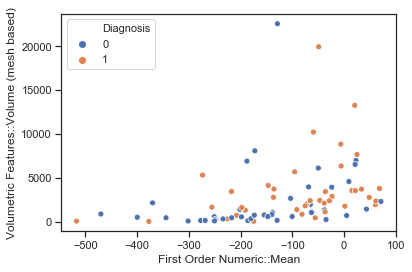

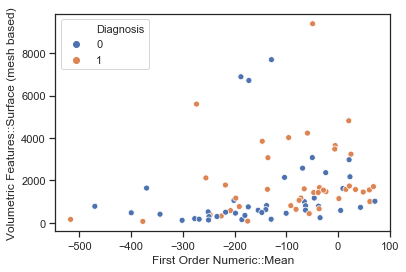

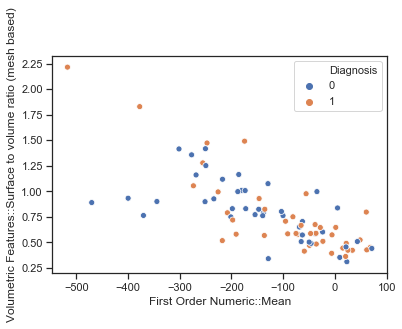

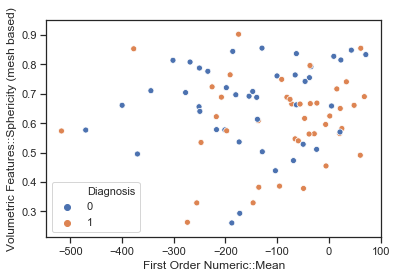

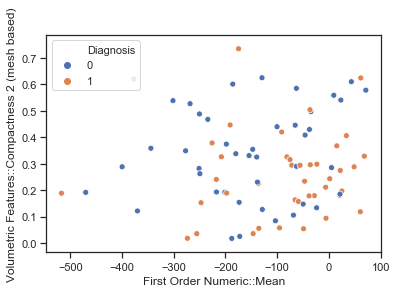

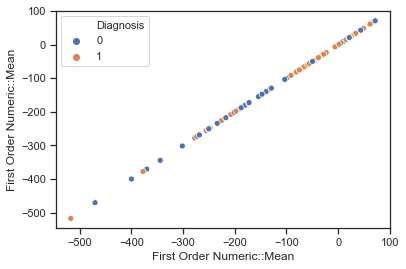

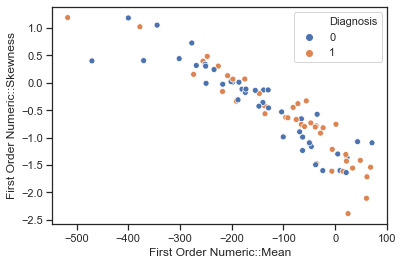

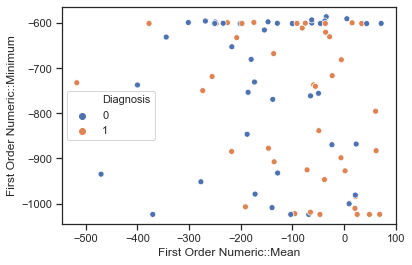

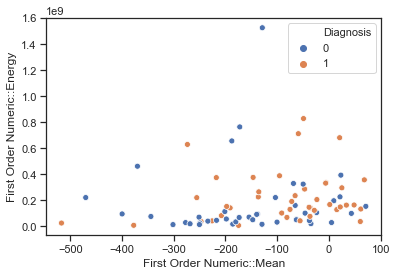

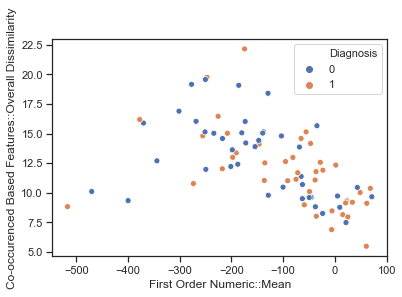

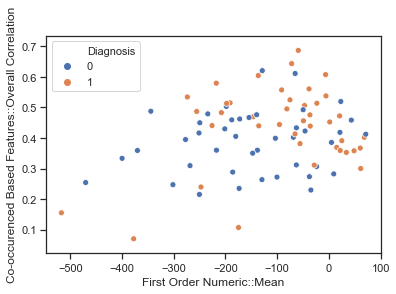

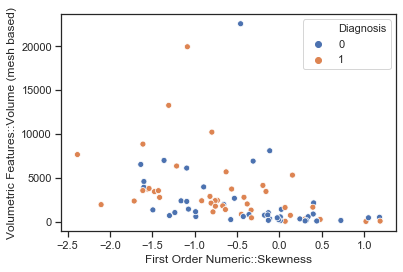

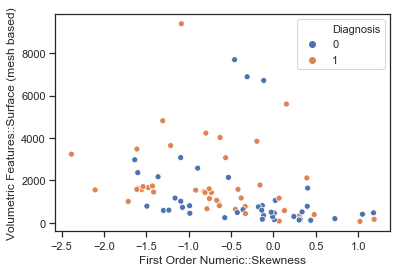

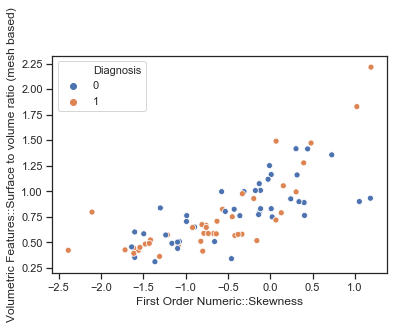

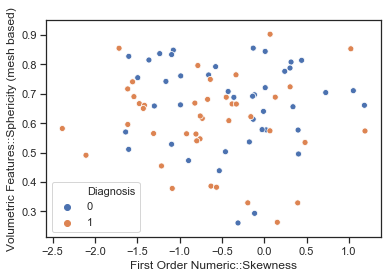

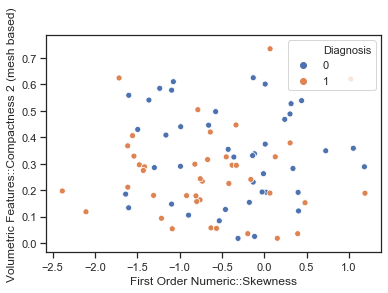

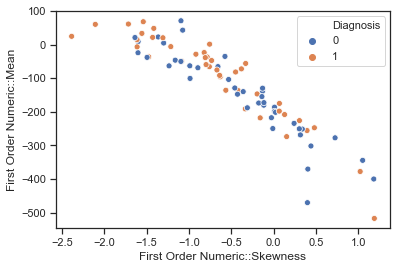

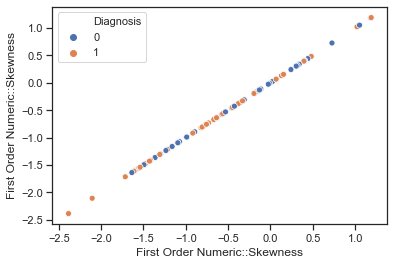

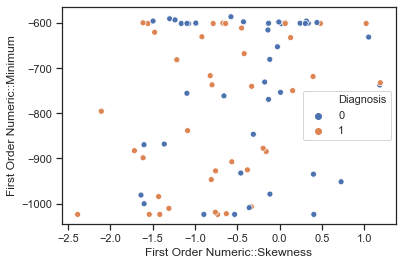

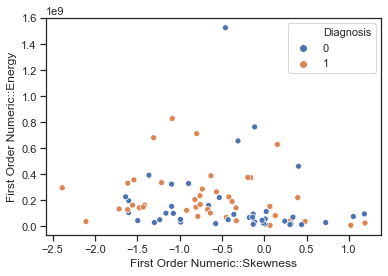

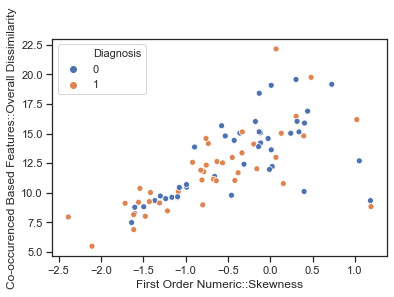

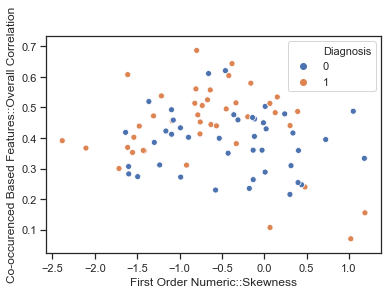

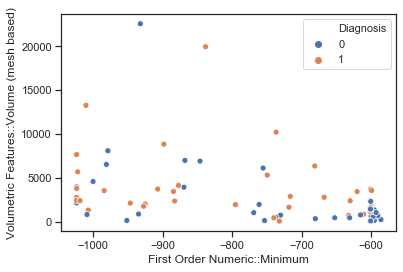

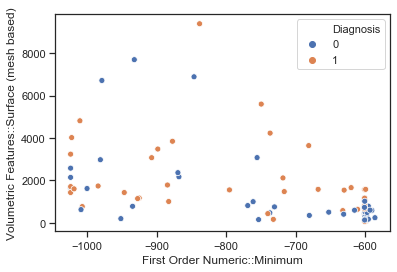

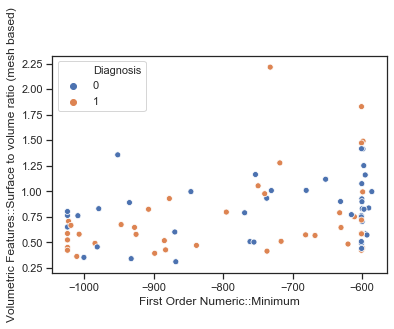

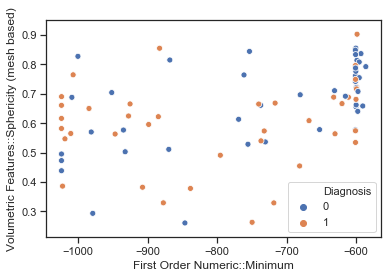

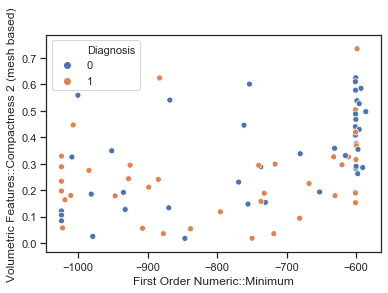

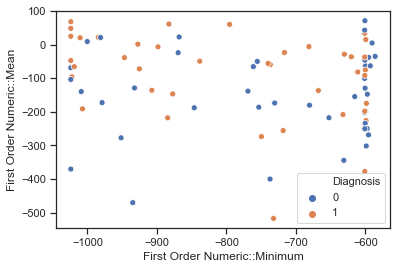

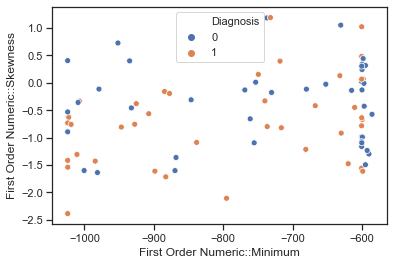

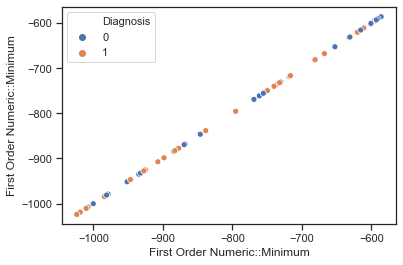

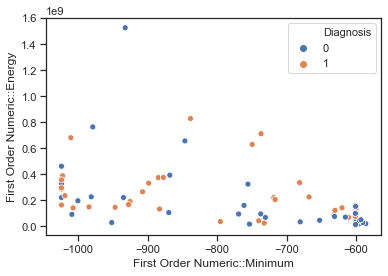

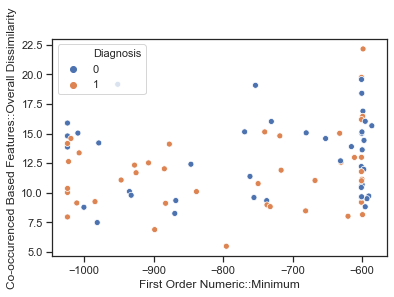

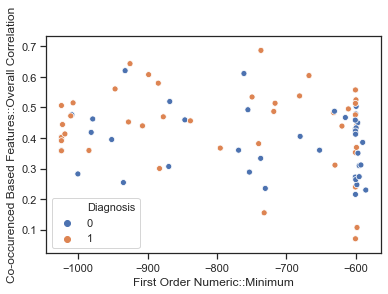

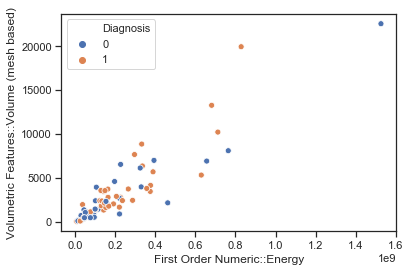

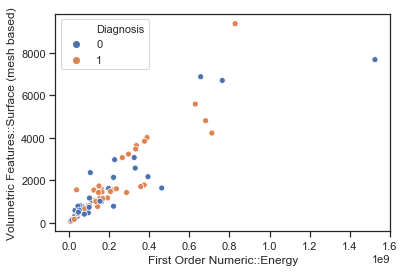

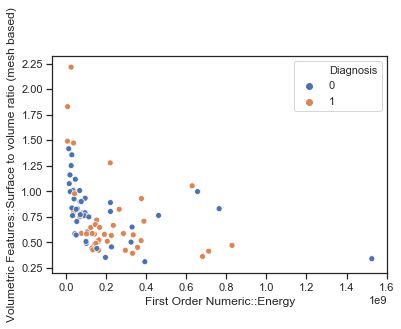

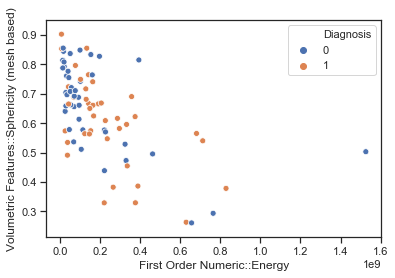

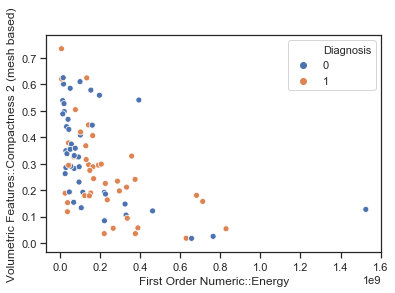

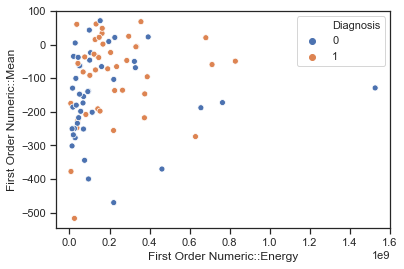

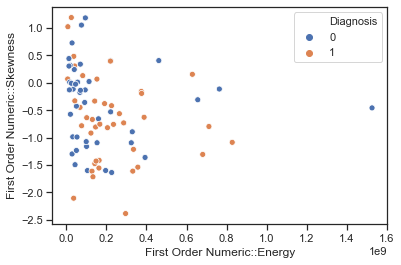

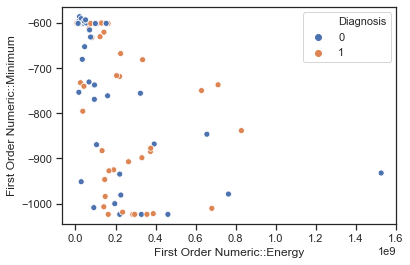

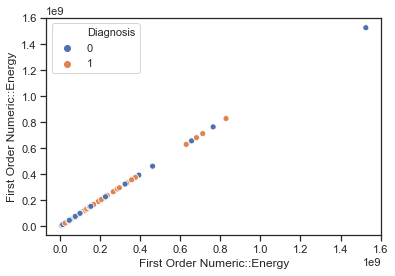

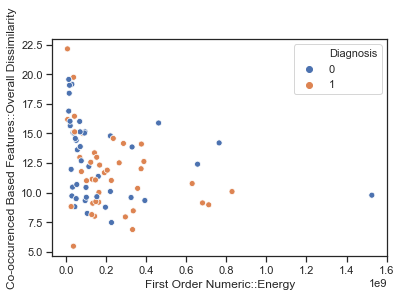

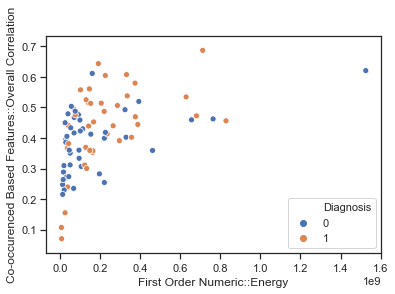

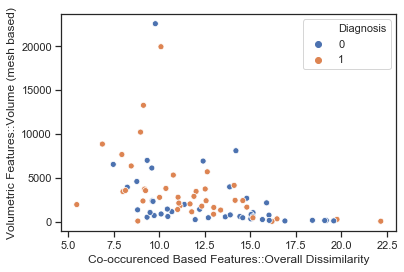

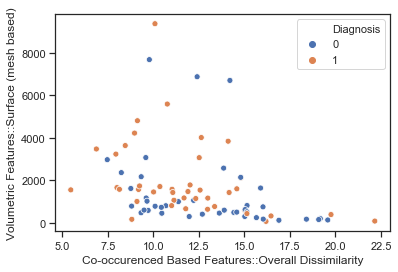

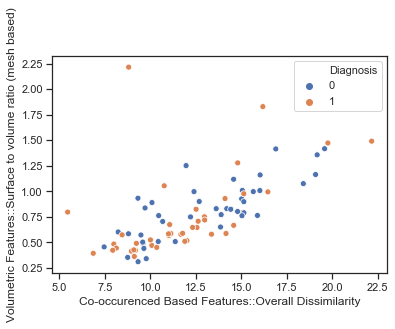

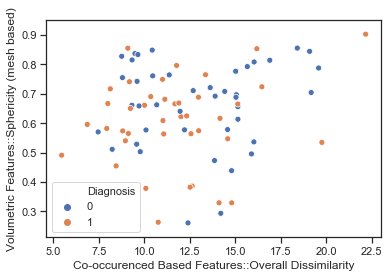

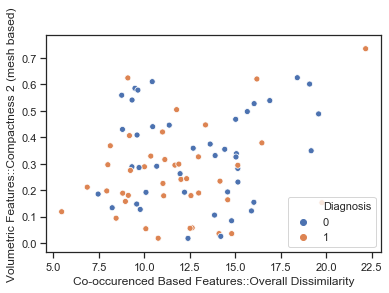

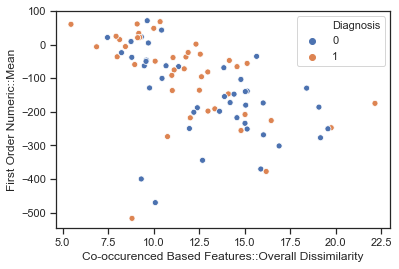

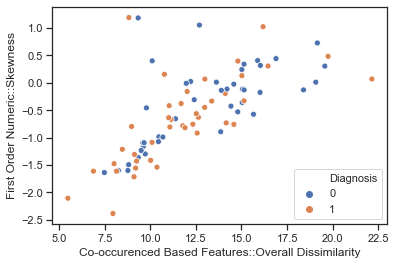

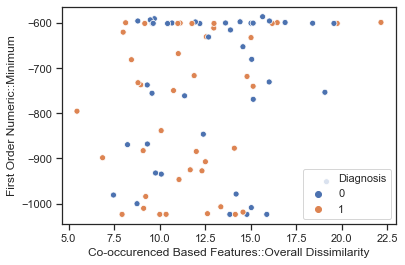

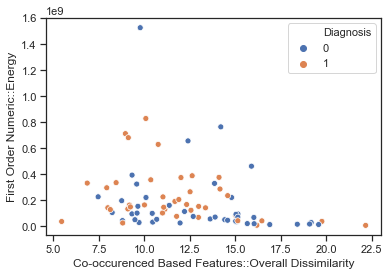

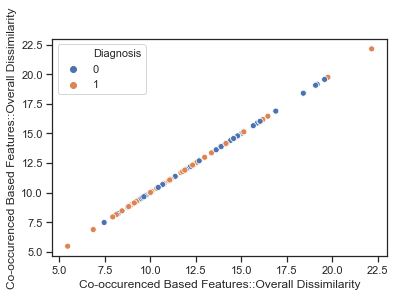

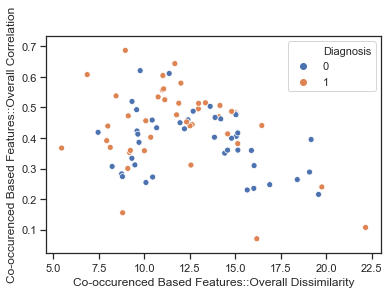

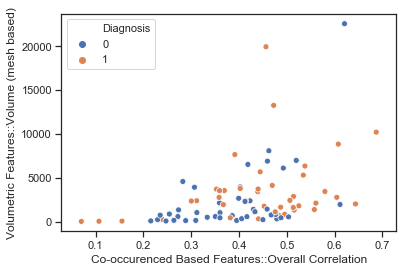

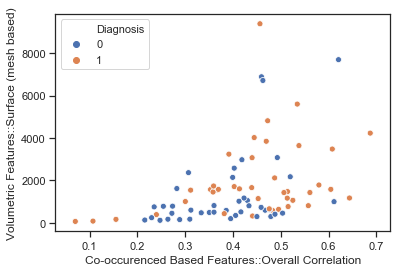

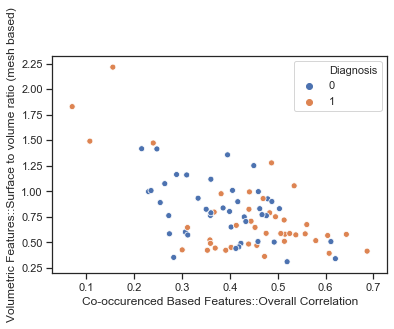

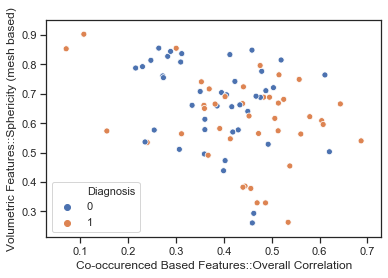

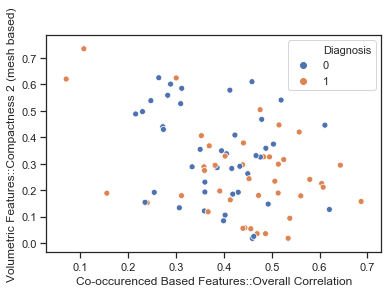

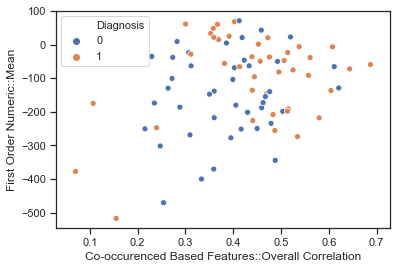

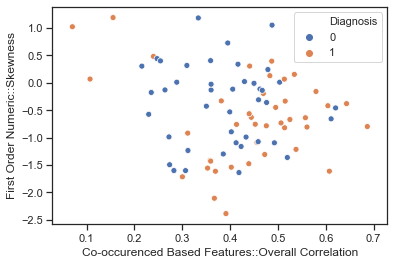

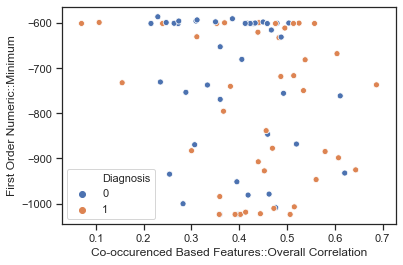

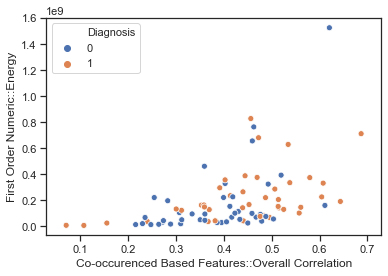

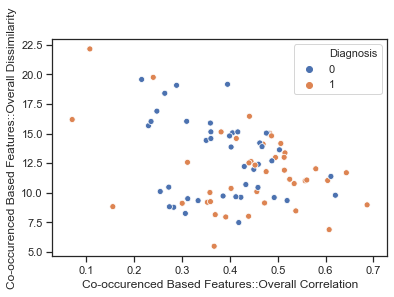

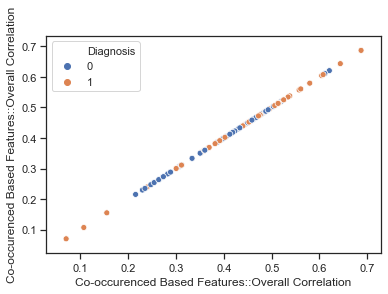

In [80]:
#plt.scatter(df[feature_signif[0]].values,df[feature_signif[8]].values)
#sns.pairplot(df, vars=feature_signif[0:2],hue="Diagnosis")
%matplotlib inline
for i in range(len(feature_signif)):
    for j in range(len(feature_signif)):
        x = df[feature_signif[i]].values
        y = df[feature_signif[j]].values
        v = df['Diagnosis']
        plt.figure()
        plt.xlabel(feature_signif[i])
        plt.ylabel(feature_signif[j])
        sns.scatterplot(x,y,hue=v)
        plt.show()

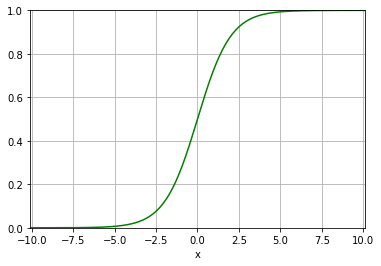

In [49]:
x = np.arange(-10.2,10.2,0.1)
plt.figure()
plt.plot(x,1/(1+np.exp(-x)),'g')
plt.grid(True)
plt.xlabel('x')
plt.xlim(x[1],x[-1])
plt.ylim(0,1)
#plt.savefig("foo.png", bbox_inches='tight', dpi=600)
plt.show()